In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_iris
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('realistic_linear_regression_dataset.csv', engine='pyarrow')
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.rename(columns={'productcategory':'product_category', 'customersegment': 'customer_segment',	
                   'ispromotionapplied':'promotion_applied', 'productioncost':'production_cost', 
                   'marketingspend':'marketing_spend', 'seasonaldemandindex':'seasonal_demand_index', 
                   'competitorprice':'competitor_price', 'customerrating':'customer_rating', 
                   'economicindex':'economic_index', 'storecount':'store_count', 'salesrevenue':'sales_revenue'}, 
         inplace=True)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category       2000 non-null   object 
 1   region                 2000 non-null   object 
 2   customer_segment       2000 non-null   object 
 3   promotion_applied      2000 non-null   object 
 4   production_cost        2000 non-null   float64
 5   marketing_spend        2000 non-null   float64
 6   seasonal_demand_index  2000 non-null   float64
 7   competitor_price       2000 non-null   float64
 8   customer_rating        2000 non-null   float64
 9   economic_index         2000 non-null   float64
 10  store_count            2000 non-null   int64  
 11  sales_revenue          2000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 621.9 KB


In [7]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

print('-' * 127)
display(df.head(10))

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (2000, 12)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['product_category', 'region', 'customer_segment', 'promotion_applied', 'production_cost', 'marketing_spend', 'seasonal_demand_index', 'competitor_price', 'customer_rating', 'economic_index', 'store_count', 'sales_revenue']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category       2000 non-null   object 
 1   region                 2000 non-null   object 
 2   

,product_category,region,customer_segment,promotion_applied,production_cost,marketing_spend,seasonal_demand_index,competitor_price,customer_rating,economic_index,store_count,sales_revenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482
5,Toys,East,Middle Income,Yes,473.538530,211.524831,0.889315,373.809453,2.983348,107.560655,44,1508.999424
6,Electronics,West,High Income,No,661.838133,286.688135,2.366967,280.979781,3.880772,131.664772,21,2032.613437
7,Electronics,East,Middle Income,Yes,473.895381,203.007234,1.835779,394.258987,3.533823,77.247271,77,2275.629598
8,Furniture,North,Low Income,Yes,473.535731,136.041929,1.376790,269.914495,4.590402,85.676361,47,2118.502178
9,Clothing,North,Low Income,No,363.692166,169.706578,1.382385,293.706781,3.929559,111.885307,75,2199.659395


In [8]:
df.select_dtypes('float').head(3)

,production_cost,marketing_spend,seasonal_demand_index,competitor_price,customer_rating,economic_index,sales_revenue
0,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,2293.143707
1,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,1640.454368
2,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,2173.086023


In [9]:
# rounding floats values
floats = df.select_dtypes('float')

for f in floats: 
    df[f] = round(df[f], 2)

In [10]:
df.head()

,product_category,region,customer_segment,promotion_applied,production_cost,marketing_spend,seasonal_demand_index,competitor_price,customer_rating,economic_index,store_count,sales_revenue
0,Furniture,East,High Income,Yes,536.05,189.28,1.16,220.83,4.04,146.23,52,2293.14
1,Toys,West,High Income,No,352.70,255.92,1.55,467.22,4.11,104.26,35,1640.45
2,Electronics,South,High Income,No,618.99,277.40,1.67,363.62,4.02,77.22,44,2173.09
3,Furniture,West,Middle Income,Yes,339.96,153.56,1.41,209.85,4.15,128.28,15,1672.61
4,Furniture,West,Middle Income,Yes,477.95,155.81,2.18,274.86,4.91,111.31,61,2443.22


In [11]:
df.select_dtypes('object').head(3)

,product_category,region,customer_segment,promotion_applied
0,Furniture,East,High Income,Yes
1,Toys,West,High Income,No
2,Electronics,South,High Income,No


In [12]:
objects = df.select_dtypes('object')
for col in objects.columns:
    #print(f"\n{col}:")
    print(f"{'='*50}")
    print(df[col].value_counts())
    print(f"{'='*50}")

product_category
Electronics    525
Clothing       493
Furniture      491
Toys           491
Name: count, dtype: int64
region
South    516
North    511
West     507
East     466
Name: count, dtype: int64
customer_segment
Low Income       703
High Income      666
Middle Income    631
Name: count, dtype: int64
promotion_applied
No     1028
Yes     972
Name: count, dtype: int64


In [13]:
objects = df.select_dtypes('object')
for col in objects.columns:
    print(f"{'='*50}")
    print(f"{col}:")
    print(df[col].unique())

product_category:
['Furniture' 'Toys' 'Electronics' 'Clothing']
region:
['East' 'West' 'South' 'North']
customer_segment:
['High Income' 'Middle Income' 'Low Income']
promotion_applied:
['Yes' 'No']


In [14]:
objects = df.select_dtypes('object')
for col in objects.columns:
    print(f"{'='*50}")
    print(f"Column: {col}")
    print(f"{'='*50}")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

Column: product_category
product_category
Electronics    525
Clothing       493
Furniture      491
Toys           491
Name: count, dtype: int64
Unique values: 4
Column: region
region
South    516
North    511
West     507
East     466
Name: count, dtype: int64
Unique values: 4
Column: customer_segment
customer_segment
Low Income       703
High Income      666
Middle Income    631
Name: count, dtype: int64
Unique values: 3
Column: promotion_applied
promotion_applied
No     1028
Yes     972
Name: count, dtype: int64
Unique values: 2


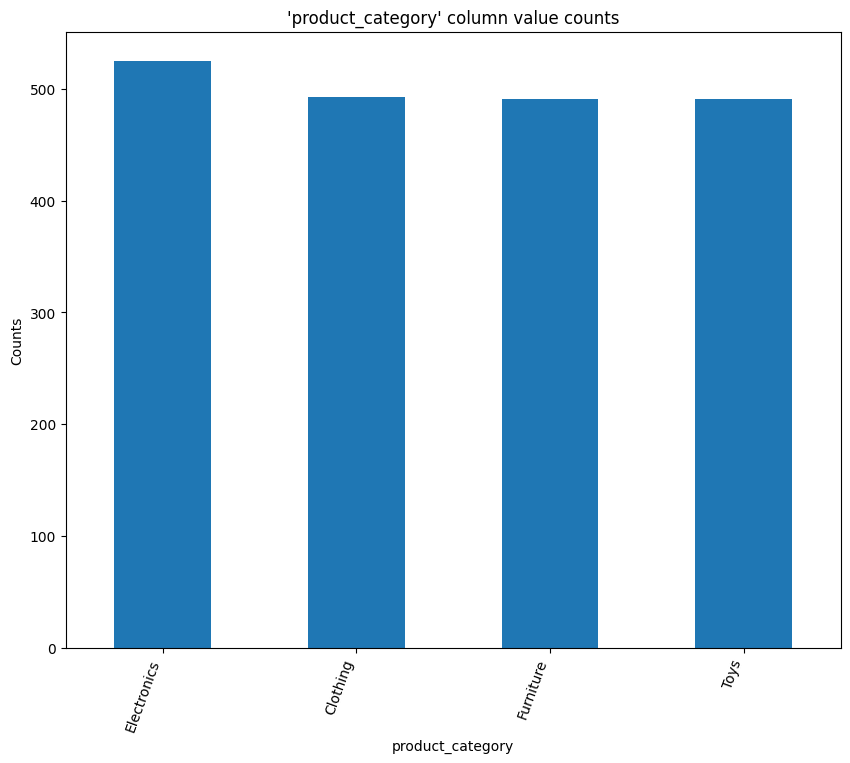

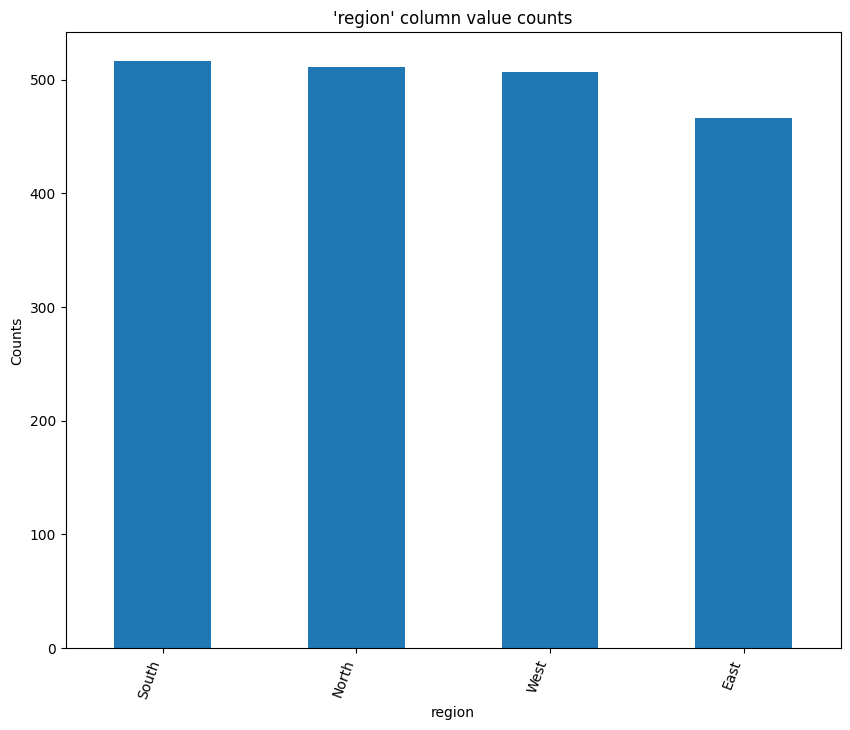

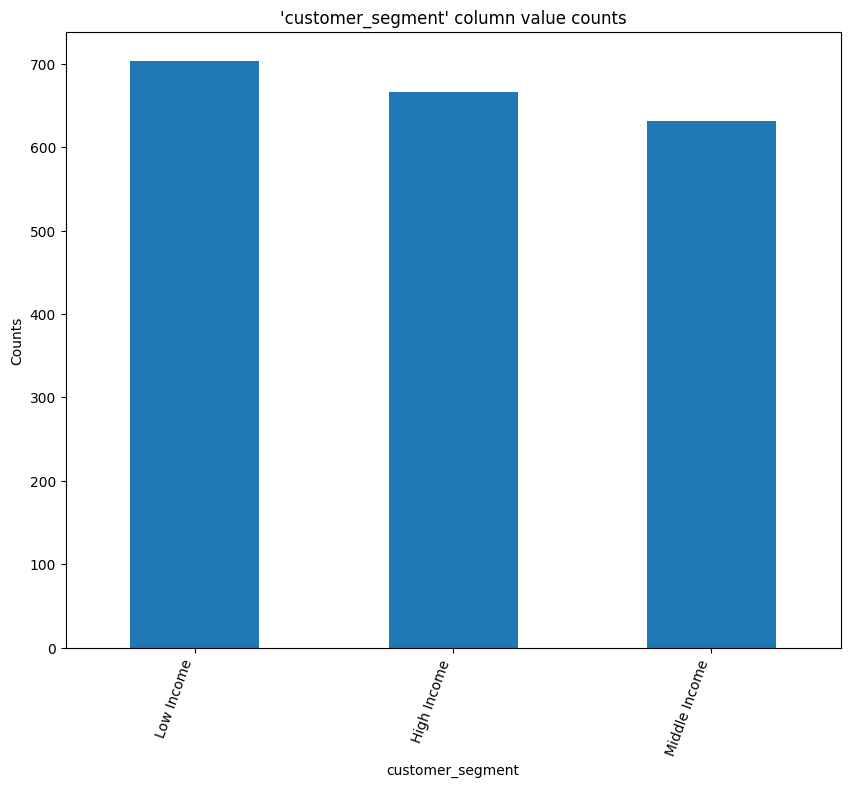

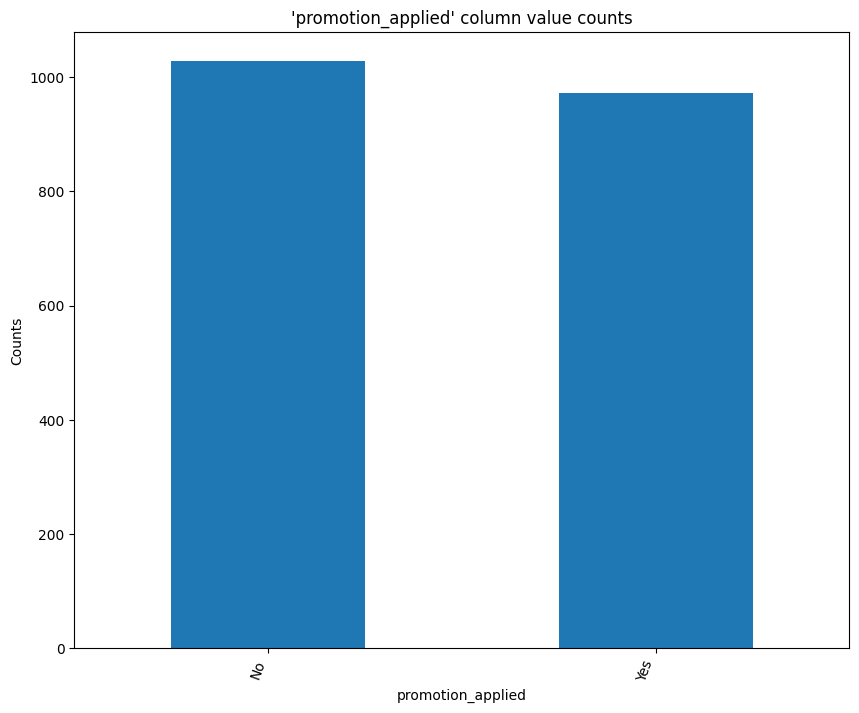

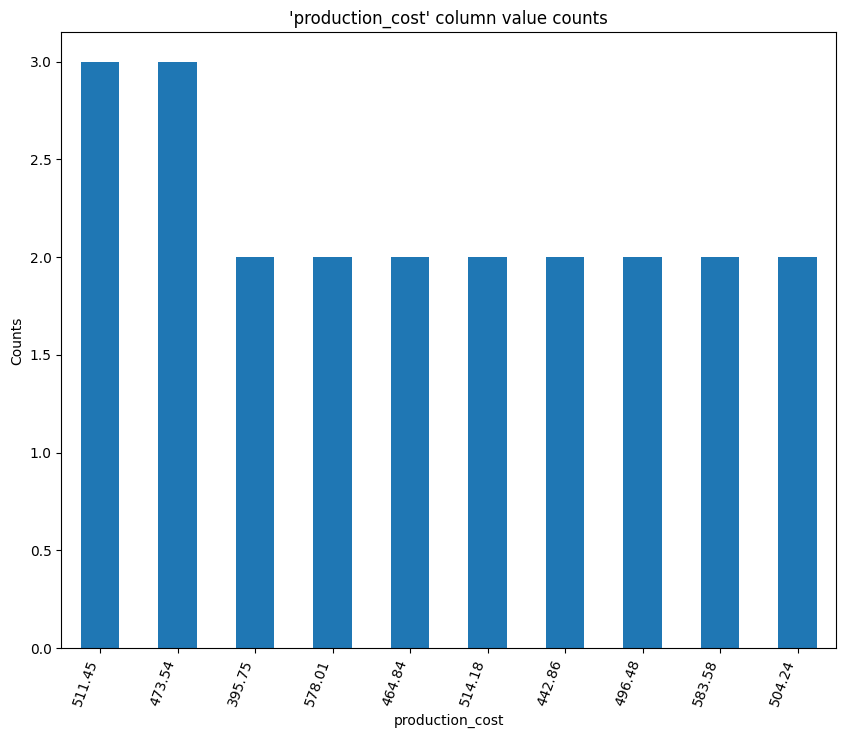

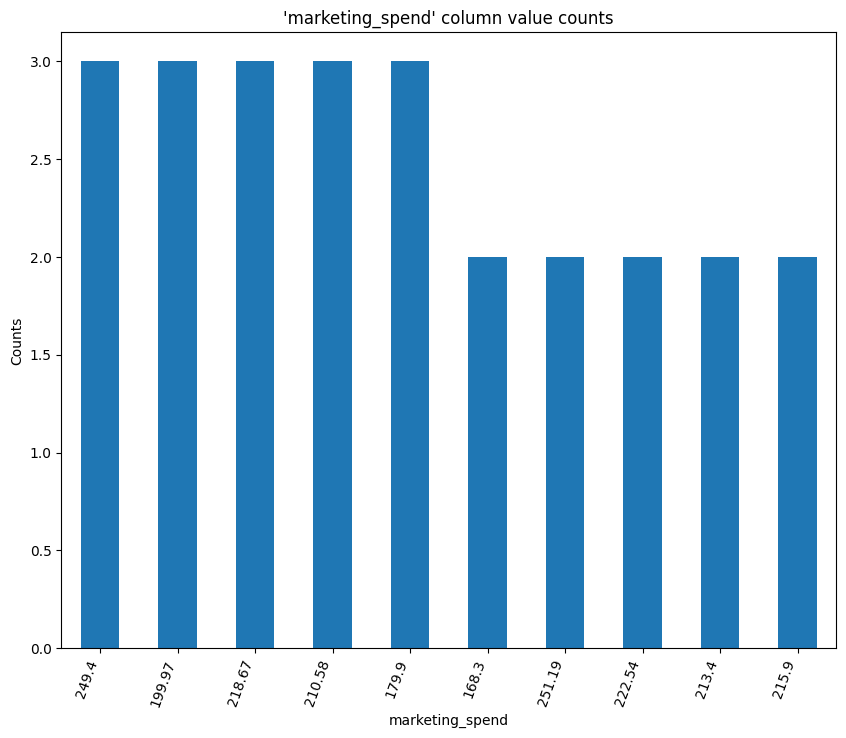

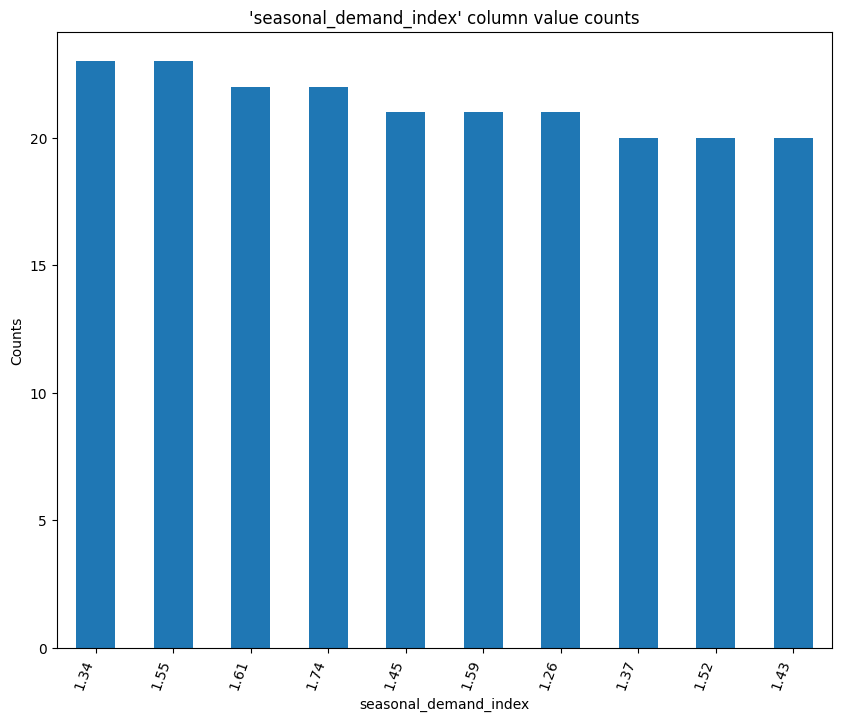

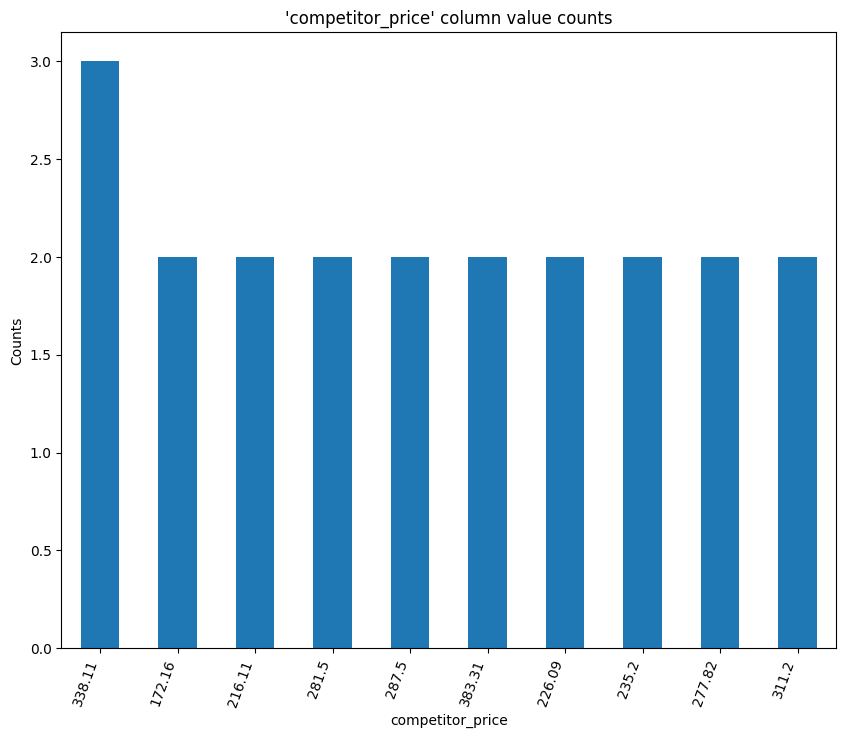

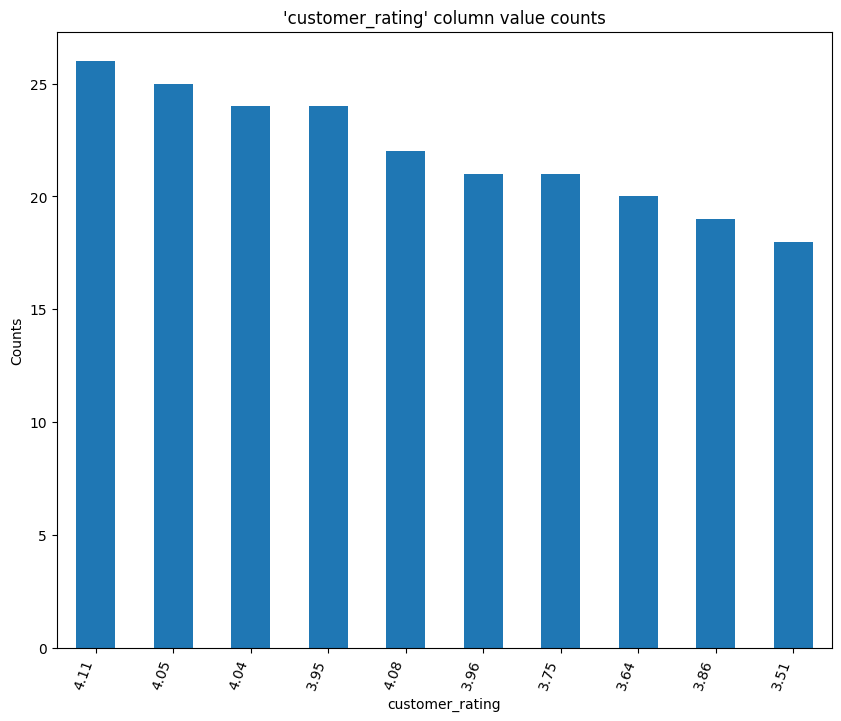

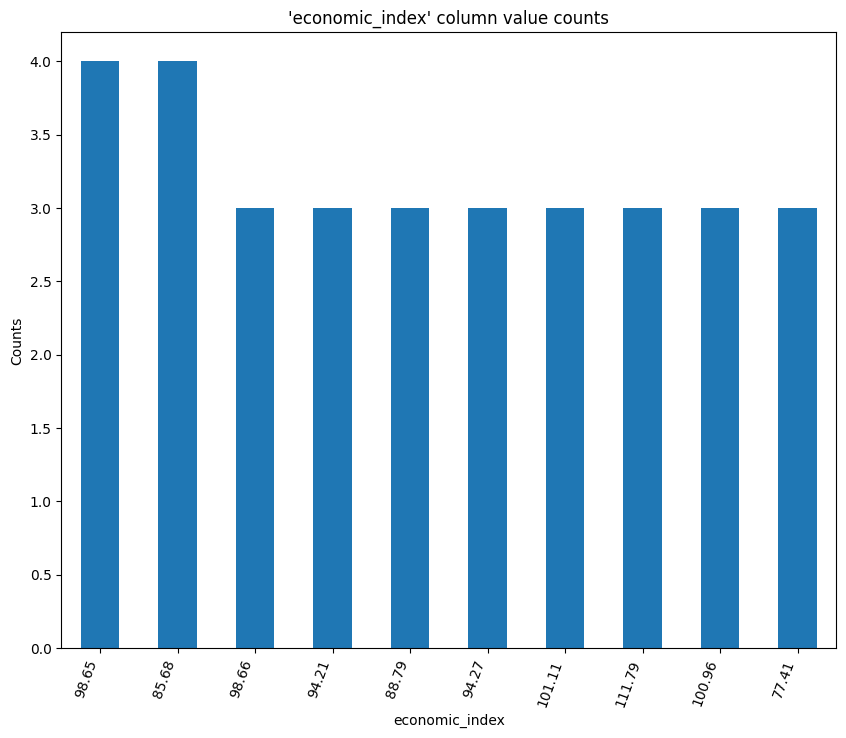

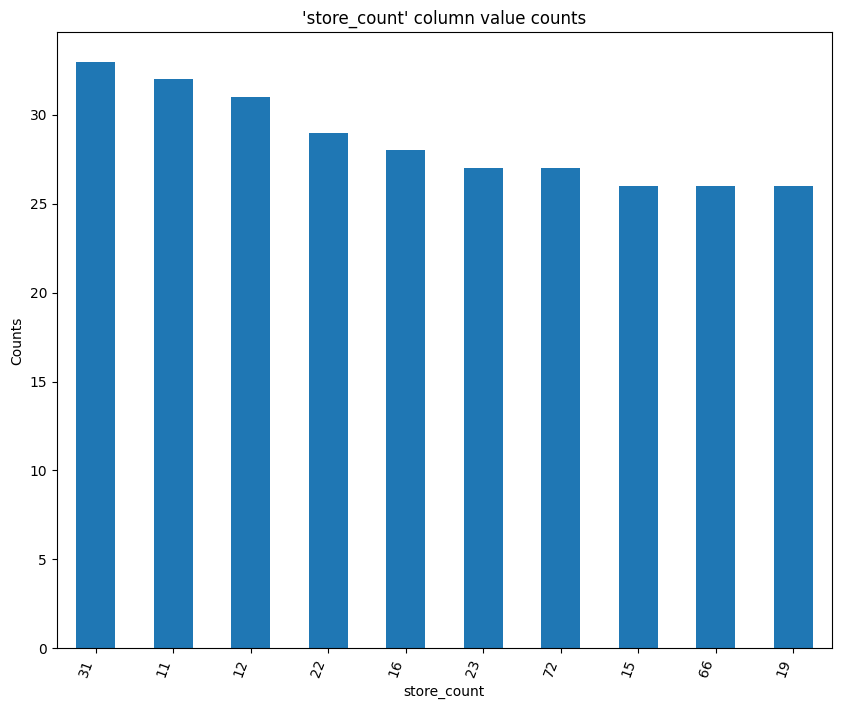

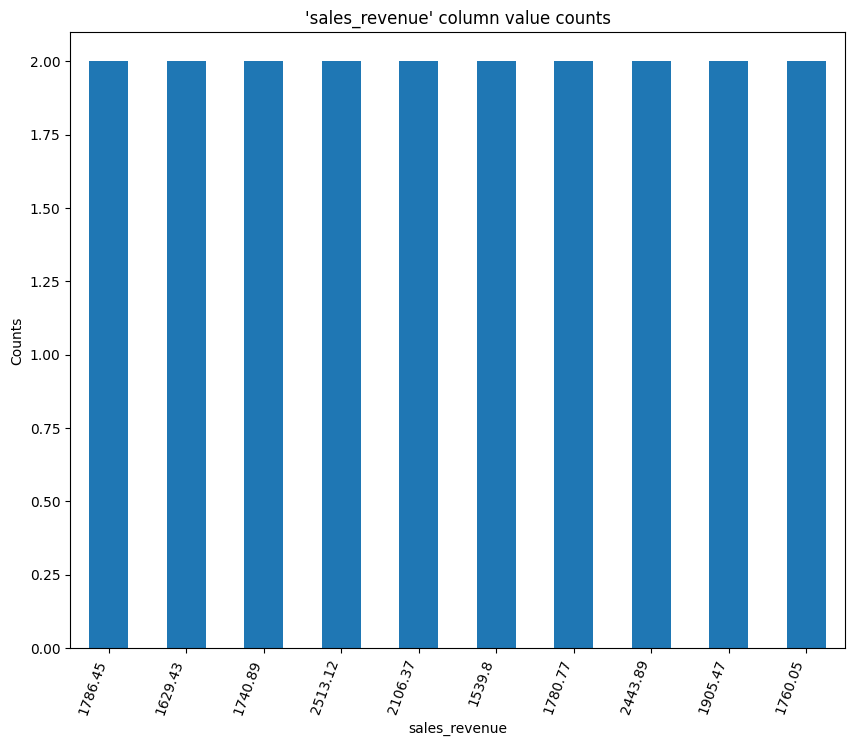

In [15]:
# Data Distribution
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

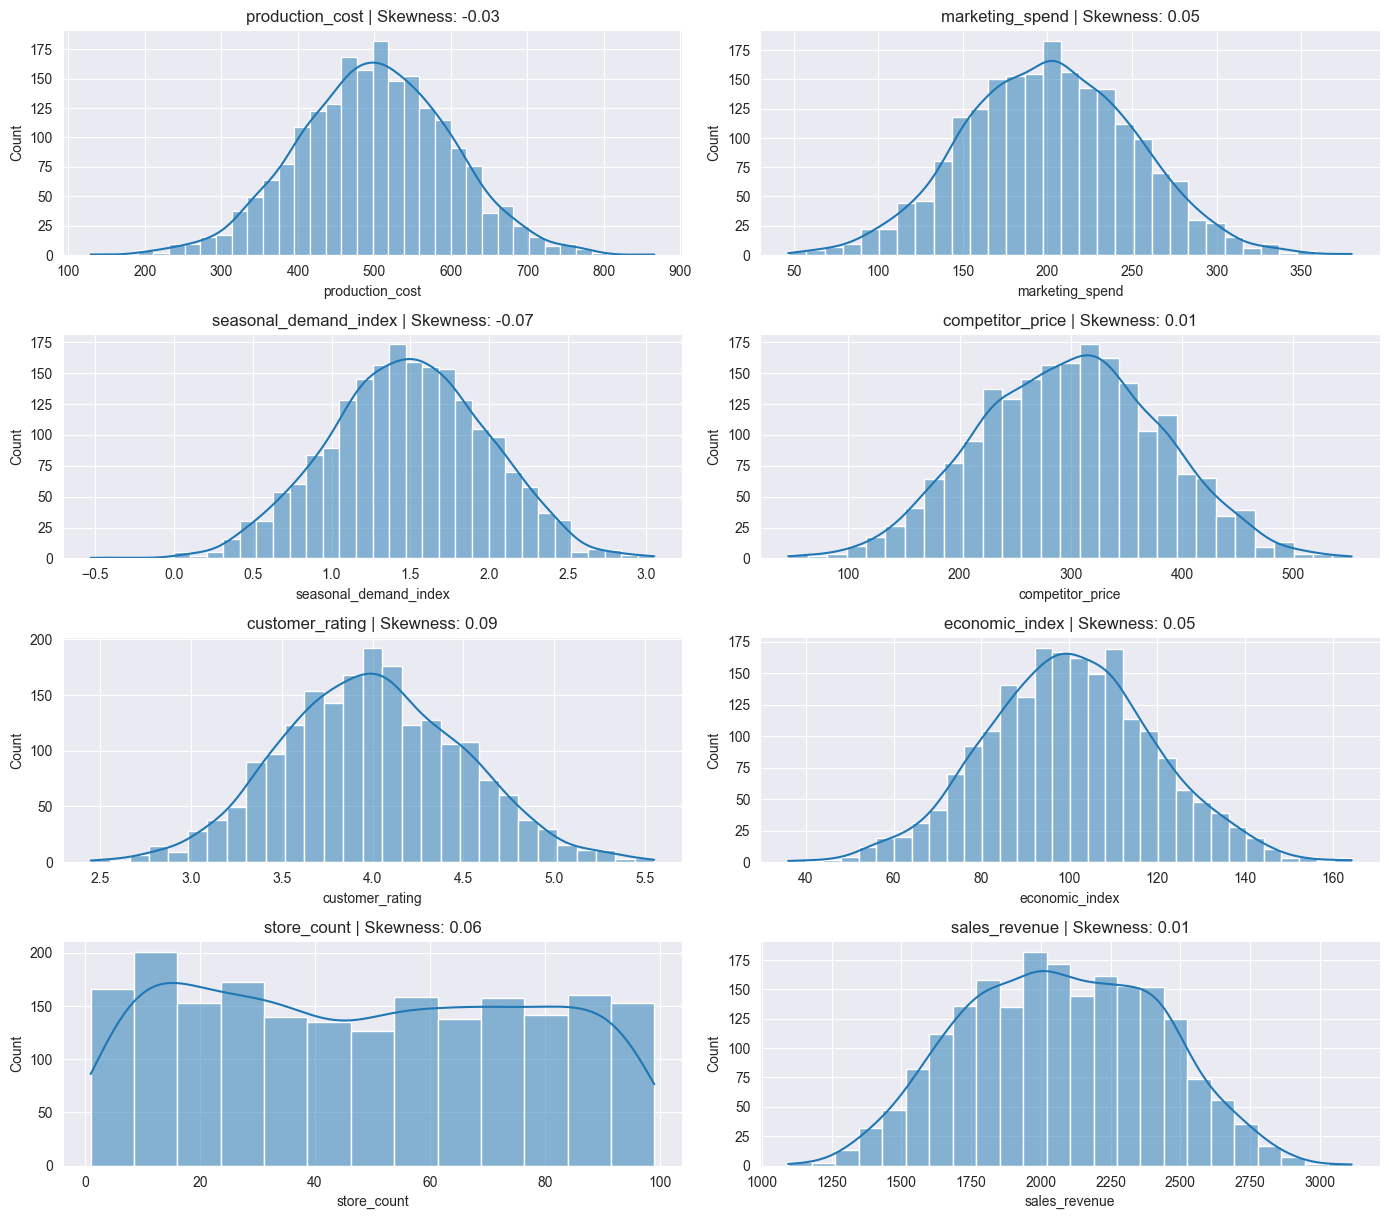

In [16]:
# Kernel Density Plot for understanding variance in the dataset
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int", "float"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

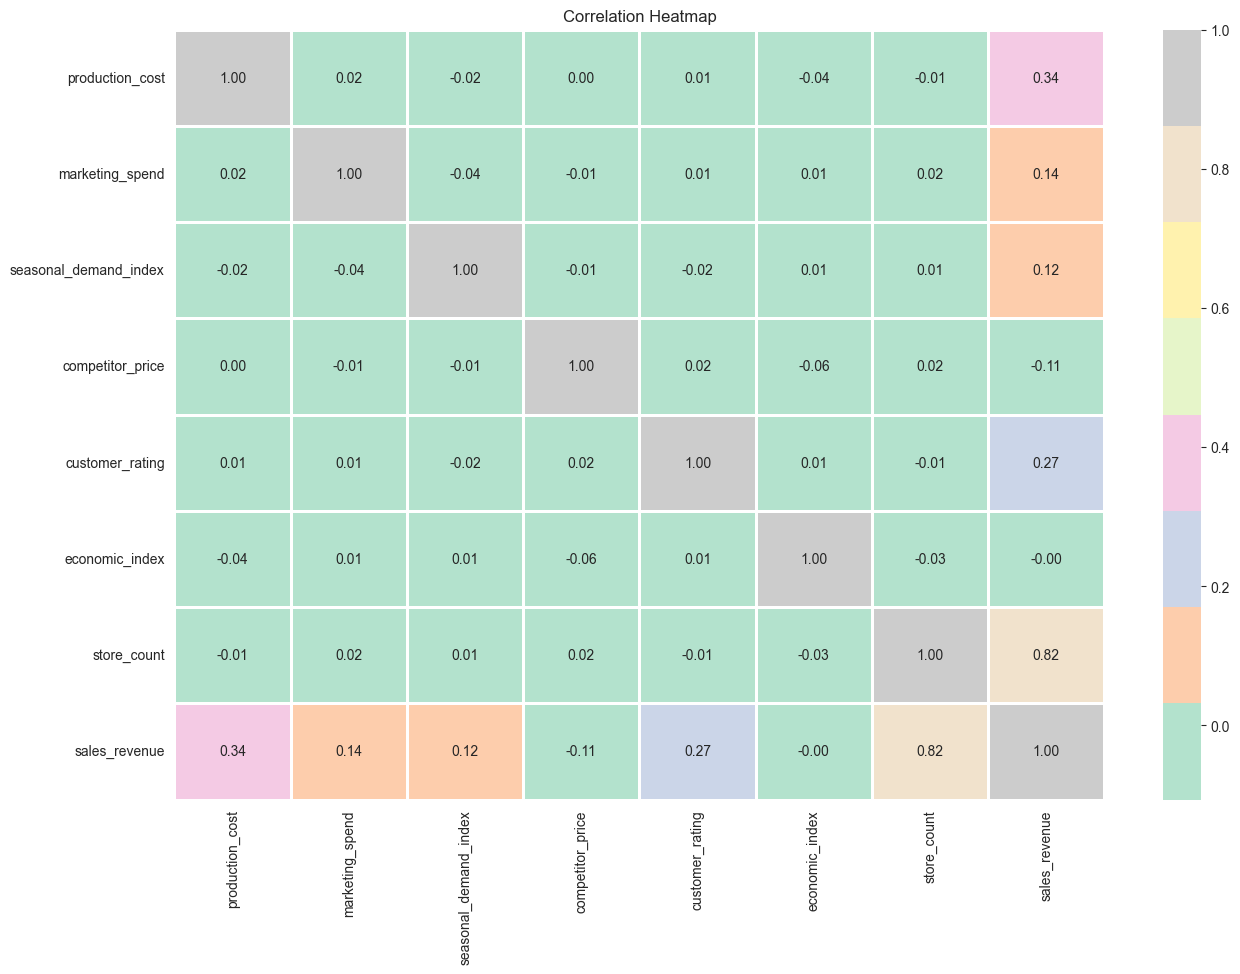

In [17]:
# Correlation Matrix for examining the correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, 
            fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show() 

In [18]:
df.select_dtypes('float').head(3)

,production_cost,marketing_spend,seasonal_demand_index,competitor_price,customer_rating,economic_index,sales_revenue
0,536.05,189.28,1.16,220.83,4.04,146.23,2293.14
1,352.70,255.92,1.55,467.22,4.11,104.26,1640.45
2,618.99,277.40,1.67,363.62,4.02,77.22,2173.09


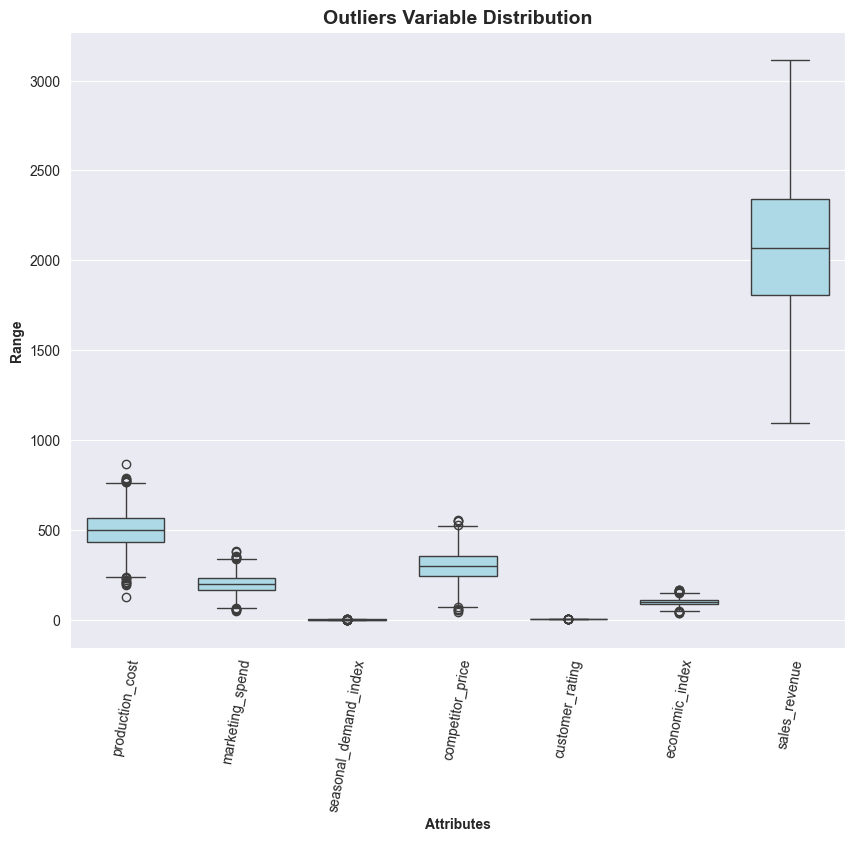

In [19]:
# Visualize Outlier Analysis one by one 
num_cols = df.select_dtypes('float').columns

# Option 2: Use color parameter instead of palette
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=df[num_cols], orient="v", 
           color="lightblue", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.xticks(rotation=80);

In [57]:
# Removing (statistical) outliers for any column
Q1 = df.production_cost.quantile(0.25)
Q3 = df.production_cost.quantile(0.75)
IQR = Q3 - Q1
print(f"Shape {df.shape} with Outliers")
df = df[(df.production_cost >= Q1 - 1.5 * IQR) & (df.production_cost <= Q3 + 1.5 * IQR)]
print(f"Shape {df.shape} without Outliers")  

Shape (1908, 12) with Outliers
Shape (1908, 12) without Outliers


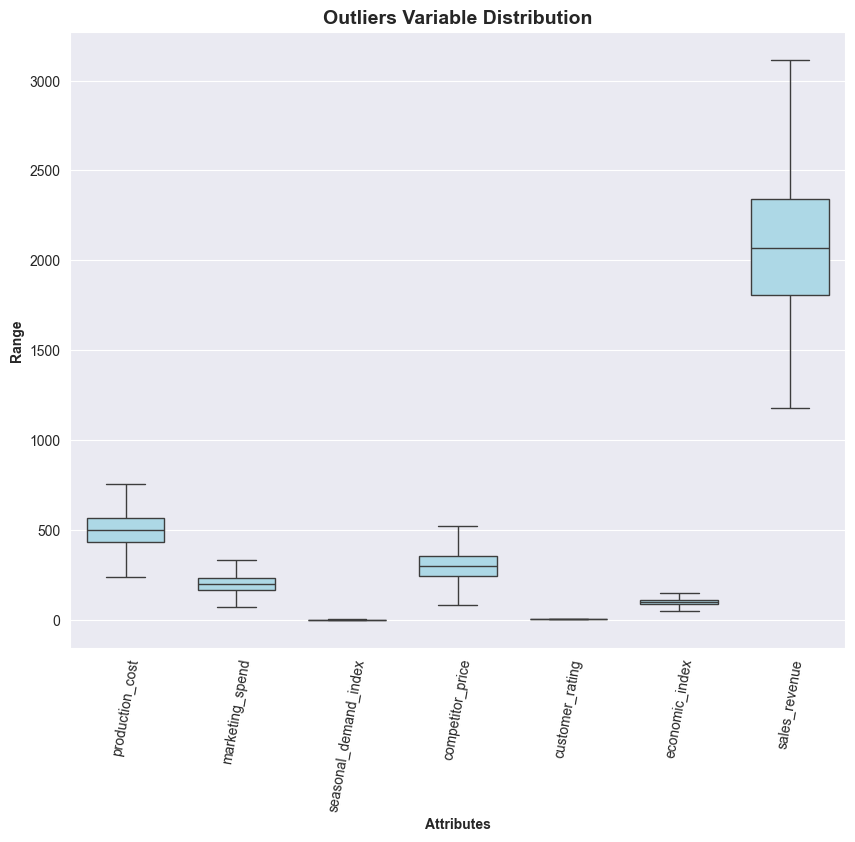

In [58]:
# Visualize Outlier Analysis one by one 
num_cols = df.select_dtypes('float').columns

# Option 2: Use color parameter instead of palette
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=df[num_cols], orient="v", 
           color="lightblue", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.xticks(rotation=80);

promotion_applied
No     980
Yes    928
Name: count, dtype: int64


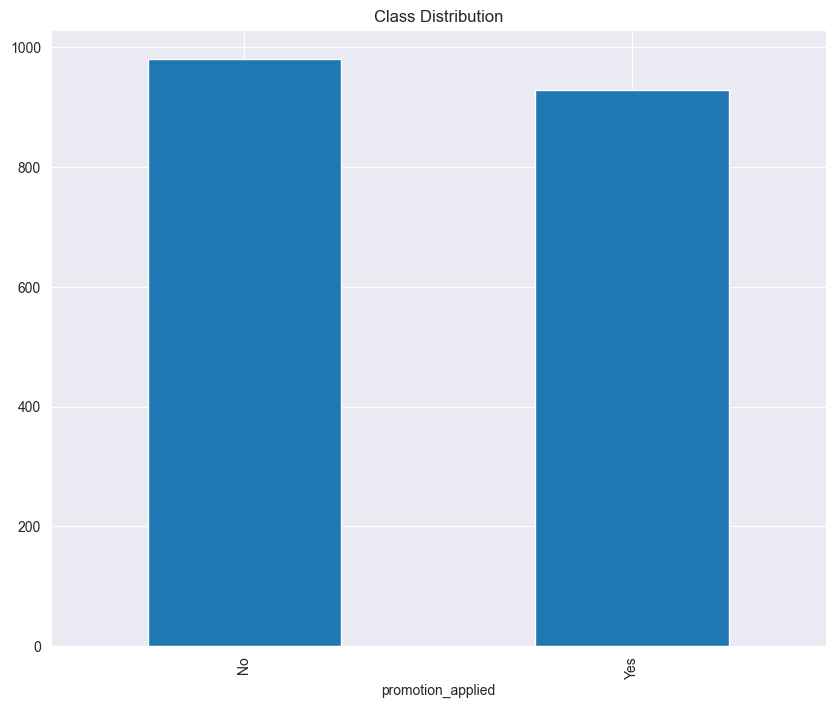

In [62]:
# Imbalance
# Visualize imbalance
print(df['promotion_applied'].value_counts())
df['promotion_applied'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

customer_segment
Low Income       665
High Income      633
Middle Income    610
Name: count, dtype: int64


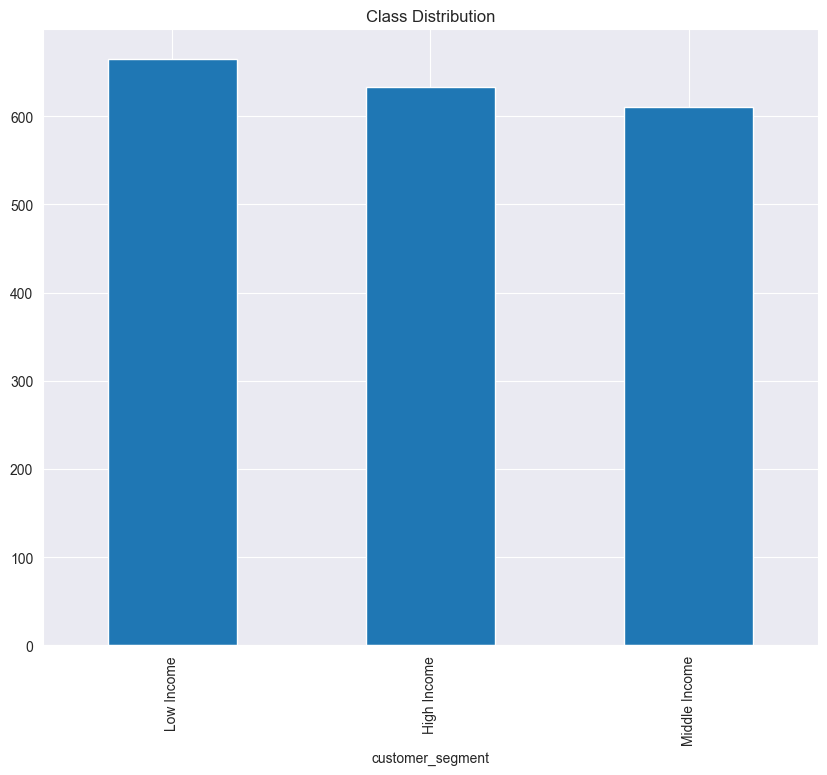

In [61]:
# Imbalance
# Visualize imbalance
print(df['customer_segment'].value_counts())
df['customer_segment'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [96]:
# copy
df1 = df.copy()

In [97]:
df1.select_dtypes(include=['object', 'category']).head(3)

,product_category,region,customer_segment,promotion_applied
0,Furniture,East,High Income,Yes
1,Toys,West,High Income,No
2,Electronics,South,High Income,No


In [98]:
# Label Encoding
# Option 1: Use a loop for multiple columns
categorical_cols = df1.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df1[f'{col}_encoded'] = le.fit_transform(df1[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform


In [102]:
df1.drop(df1.select_dtypes(include=['object', 'category']), axis=1, inplace=True)

In [119]:
# Regression Models
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from collections import Counter
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [103]:
df1.head(3)

,production_cost,marketing_spend,seasonal_demand_index,competitor_price,customer_rating,economic_index,store_count,sales_revenue,product_category_encoded,region_encoded,customer_segment_encoded,promotion_applied_encoded
0,536.05,189.28,1.16,220.83,4.04,146.23,52,2293.14,2,0,0,1
1,352.70,255.92,1.55,467.22,4.11,104.26,35,1640.45,3,3,0,0
2,618.99,277.40,1.67,363.62,4.02,77.22,44,2173.09,1,2,0,0


## AdaBoostRegressor

In [115]:
X = df1.drop(columns=['sales_revenue'], axis=1) 
y = df1['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. BASIC GRID SEARCH TUNING
print("1. Grid Search Tuning")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Grid search with cross-validation
ada_grid = AdaBoostRegressor(random_state=42)
grid_search = GridSearchCV(
    ada_grid, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {-grid_search.best_score_:.4f}")

# Test performance
y_pred_grid = grid_search.predict(X_test)
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_grid):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_grid):.4f}")
print(f"Test RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_grid)):.4f}")
print(f"Test R²:  {r2_score(y_test, y_pred_grid):.4f}")
print("-" * 127) 

# 2. RANDOMIZED SEARCH TUNING
print("2. Randomized Search Tuning")

# Extended parameter distribution for random search
param_dist = {
    'n_estimators': np.arange(10, 500, 10),
    'learning_rate': np.logspace(-3, 0, 100),  # 0.001 to 1.0
    'loss': ['linear', 'square', 'exponential'],
    'estimator__max_depth': [1, 2, 3, 4, 5, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Use DecisionTreeRegressor as base estimator with tunable parameters
base_tree = DecisionTreeRegressor(random_state=42)
ada_random = AdaBoostRegressor(estimator=base_tree, random_state=42)

random_search = RandomizedSearchCV(
    ada_random,
    param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV score: {-random_search.best_score_:.4f}")

# Test performance
y_pred_random = random_search.predict(X_test)
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_random):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_random):.4f}")
print(f"Test RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_random)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_random):.4f}")
print("-" * 127) 

# 3. VALIDATION CURVE ANALYSIS
print("3. Validation Curve Analysis")

# Analyze n_estimators
n_estimators_range = np.arange(10, 201, 20)
train_scores, val_scores = validation_curve(
    AdaBoostRegressor(learning_rate=0.1, random_state=42),
    X_train, y_train,
    param_name='n_estimators',
    param_range=n_estimators_range,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convert to positive MSE for easier interpretation
train_scores = -train_scores
val_scores = -val_scores

print("N_estimators validation curve created")
print(f"Optimal n_estimators around: {n_estimators_range[np.argmin(val_scores.mean(axis=1))]}") 

# Analyze learning rate
lr_range = np.logspace(-3, 0, 10)
train_scores_lr, val_scores_lr = validation_curve(
    AdaBoostRegressor(n_estimators=100, random_state=42),
    X_train, y_train,
    param_name='learning_rate',
    param_range=lr_range,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

train_scores_lr = -train_scores_lr
val_scores_lr = -val_scores_lr

print(f"Optimal learning_rate around: {lr_range[np.argmin(val_scores_lr.mean(axis=1))]:.4f}")
print("-" * 127) 

# 4. CUSTOM TUNING WITH DIFFERENT BASE ESTIMATORS
print("4. Custom Base Estimator Tuning")

# Test different base estimators
base_estimators = {
    'shallow_tree': DecisionTreeRegressor(max_depth=1, random_state=42),
    'medium_tree': DecisionTreeRegressor(max_depth=3, random_state=42),
    'deep_tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'pruned_tree': DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
}

results = {}
for name, base_est in base_estimators.items():
    ada = AdaBoostRegressor(
        estimator=base_est,
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Cross-validation
    cv_scores = cross_val_score(
        ada, X_train, y_train, 
        cv=5, scoring='neg_mean_squared_error'
    )
    
    results[name] = {
        'cv_mean': -cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"{name:12} - CV MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# 5. EARLY STOPPING SIMULATION
print("-" * 127)
print("5. Early Stopping Analysis")

# Simulate early stopping by tracking performance vs n_estimators
max_estimators = 200
step = 10
train_errors = []
val_errors = []

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

for n_est in range(step, max_estimators + 1, step):
    ada = AdaBoostRegressor(
        n_estimators=n_est,
        learning_rate=0.1,
        random_state=42
    )
    
    ada.fit(X_train_split, y_train_split)
    
    train_pred = ada.predict(X_train_split)
    val_pred = ada.predict(X_val_split)
    
    train_errors.append(mean_squared_error(y_train_split, train_pred))
    val_errors.append(mean_squared_error(y_val_split, val_pred))

# Find optimal stopping point
optimal_n_est = (np.argmin(val_errors) + 1) * step
print(f"Optimal n_estimators (early stopping): {optimal_n_est}")
print(f"Validation MSE at optimal point: {min(val_errors):.4f}")
print("-" * 127) 

# 6. COMPREHENSIVE TUNING PIPELINE
print("6. Comprehensive Tuning Pipeline")

def tune_adaboost_comprehensive(X_train, y_train, X_test, y_test, n_iter=50):
    """Comprehensive AdaBoost tuning pipeline"""
    
    # Stage 1: Coarse grid search
    coarse_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']
    }
    
    ada_coarse = AdaBoostRegressor(random_state=42)
    coarse_search = GridSearchCV(
        ada_coarse, coarse_grid, cv=3, 
        scoring='neg_mean_squared_error', n_jobs=-1
    )
    coarse_search.fit(X_train, y_train)
    
    # Stage 2: Fine-tuning around best parameters
    best_params = coarse_search.best_params_
    
    fine_grid = {
        'n_estimators': [
            max(10, best_params['n_estimators'] - 50),
            best_params['n_estimators'],
            best_params['n_estimators'] + 50
        ],
        'learning_rate': [
            best_params['learning_rate'] * 0.5,
            best_params['learning_rate'],
            best_params['learning_rate'] * 2.0
        ],
        'loss': [best_params['loss']],
        'estimator__max_depth': [1, 2, 3],
        'estimator__min_samples_leaf': [1, 2, 4]
    }
    
    # Remove values that would be <= 0
    fine_grid['learning_rate'] = [lr for lr in fine_grid['learning_rate'] if lr > 0]
    fine_grid['n_estimators'] = [n for n in fine_grid['n_estimators'] if n > 0]
    
    base_tree = DecisionTreeRegressor(random_state=42)
    ada_fine = AdaBoostRegressor(estimator=base_tree, random_state=42)
    
    fine_search = GridSearchCV(
        ada_fine, fine_grid, cv=5,
        scoring='neg_mean_squared_error', n_jobs=-1
    )
    fine_search.fit(X_train, y_train)
    
    # Final model evaluation
    final_model = fine_search.best_estimator_
    y_pred = final_model.predict(X_test)

    # Calculate metrics (fixed syntax)
    mse_score = mean_squared_error(y_test, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_score = mean_absolute_error(y_test, y_pred)
    r2_score_val = r2_score(y_test, y_pred)

    # Create results dictionary for single model (removed undefined 'models' reference)
    model_name = 'AdaBoost_Tuned'
    results = {
        model_name: {
            'MSE': mse_score, 
            'RMSE': rmse_score, 
            'MAE': mae_score, 
            'R²': r2_score_val
        }
    }
    
    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE')

    print("=== Model Results ===")
    print(results_df)
    print("-" * 127)

    print(f"Best model: {results_df.index[0]}")
    print(f"MSE: {results_df.iloc[0]['MSE']:.4f}")
    print(f"RMSE: {results_df.iloc[0]['RMSE']:.4f}")
    print(f"MAE: {results_df.iloc[0]['MAE']:.4f}")
    print(f"R² Score: {results_df.iloc[0]['R²']:.4f}")
    print("-" * 127) 
    
    # Return results (fixed structure)
    results2 = {
        'best_params': fine_search.best_params_,
        'cv_score': -fine_search.best_score_,
        'test_mse': mse_score,
        'test_rmse': rmse_score,
        'test_mae': mae_score,
        'test_r2': r2_score_val,
        'model': final_model
    }
    
    return results2

# Example usage (you'll need to provide your own X_train, y_train, X_test, y_test):
comprehensive_results = tune_adaboost_comprehensive(X_train, y_train, X_test, y_test)
 
print("Comprehensive Tuning Results:")
print(f"Best parameters: {comprehensive_results['best_params']}")
print(f"CV MSE: {comprehensive_results['cv_score']:.4f}")
print(f"Test MSE: {comprehensive_results['test_mse']:.4f}")
print(f"Test RMSE: {comprehensive_results['test_rmse']:.4f}")
print(f"Test MAE: {comprehensive_results['test_mae']:.4f}")
print(f"Test R²: {comprehensive_results['test_r2']:.4f}")
print("-" * 127)

1. Grid Search Tuning
Best parameters: {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 200}
Best CV score: 15490.9164
Test MAE: 99.2098
Test MSE: 15398.4924
Test RMSE:124.0907
Test R²:  0.8637
-------------------------------------------------------------------------------------------------------------------------------
2. Randomized Search Tuning
Best parameters: {'n_estimators': 480, 'loss': 'linear', 'learning_rate': 0.40370172585965536, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': None}
Best CV score: 13124.8854
Test MAE: 93.3768
Test MSE: 13464.7148
Test RMSE:116.0376
Test R²: 0.8808
-------------------------------------------------------------------------------------------------------------------------------
3. Validation Curve Analysis
N_estimators validation curve created
Optimal n_estimators around: 190
Optimal learning_rate around: 1.0000
-----------------------------------------------------------------------------------

## BaggingRegressor

In [121]:
# Load data
X = df1.drop(columns=['sales_revenue'], axis=1) 
Y = df1['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example 1: Basic Grid Search Tuning
print("1. BASIC GRID SEARCH TUNING")

# Define parameter grid
param_grid_basic = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize bagging regressor with decision tree
bagging_basic = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    random_state=42,
    n_jobs=-1
)

# Grid search
grid_search_basic = GridSearchCV(
    bagging_basic, 
    param_grid_basic, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_basic.fit(X_train, y_train)

print(f"Best parameters: {grid_search_basic.best_params_}")
print(f"Best CV score: {-grid_search_basic.best_score_:.4f}")

# Test performance
y_pred_basic = grid_search_basic.best_estimator_.predict(X_test)
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_basic):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_basic):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_basic)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_basic):.4f}")
print("-" * 127) 

# Example 2: Advanced Tuning with Different Base Estimators
print("2.TUNING WITH DIFFERENT BASE ESTIMATORS")

# Define different base estimators and their parameter grids
estimators_and_params = {
    'decision_tree': {
        'estimator': DecisionTreeRegressor(random_state=42),
        'params': {
            'estimator__max_depth': [3, 5, 10, None],
            'estimator__min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100, 200],
            'max_samples': [0.7, 1.0]
        }
    },
    'linear_regression': {
        'estimator': LinearRegression(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'bootstrap': [True, False]
        }
    }
}

best_models = {}

for name, config in estimators_and_params.items():
    print(f"Tuning Bagging with {name.replace('_', ' ').title()}:") #
    
    bagging = BaggingRegressor(
        estimator=config['estimator'],
        random_state=42,
        n_jobs=-1
    )
    
    grid_search = GridSearchCV(
        bagging,
        config['params'],
        cv=3,  # Reduced for faster execution
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred) 
    
    best_models[name] = {
        'model': grid_search.best_estimator_,
        'params': grid_search.best_params_,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }
    
    print(f"Best params: {grid_search.best_params_}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE:{rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R²:  {r2:.4f}")
    print()
    
# Find best overall model
best_overall = min(best_models.items(), key=lambda x: x[1]['mse'])
print(f"Best overall model: {best_overall[0]} (MSE: {best_overall[1]['mse']:.4f})")
print("-" * 127) 

# Example 3: Randomized Search for Large Parameter Space
print("3.RANDOMIZED SEARCH FOR EFFICIENCY")

# Define large parameter space with distributions
param_dist = {
    'n_estimators': randint(10, 500),
    'max_samples': uniform(0.3, 0.7),  # Between 0.3 and 1.0
    'max_features': uniform(0.3, 0.7),  # Between 0.3 and 1.0
    'estimator__max_depth': randint(1, 20),
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_random = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    random_state=42,
    n_jobs=-1
)

# Randomized search
random_search = RandomizedSearchCV(
    bagging_random,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best parameters from random search:")
for param, value in random_search.best_params_.items():
    if isinstance(value, float):
        print(f"  {param}: {value:.3f}")
    else:
        print(f"  {param}: {value}")

y_pred_random = random_search.best_estimator_.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_random):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_random)):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_random):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_random):.4f}")
print("-" * 127) 

# Example 4: Custom Evaluation with Cross-Validation
print("4.CUSTOM EVALUATION STRATEGY")

def evaluate_bagging_config(n_est, max_samp, max_feat, max_depth):
    """Custom evaluation function for specific parameter combinations"""
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=max_depth, random_state=42),
        n_estimators=n_est,
        max_samples=max_samp,
        max_features=max_feat,
        random_state=42,
        n_jobs=-1
    )
    
    # Cross-validation scores
    cv_scores = cross_val_score(bagging, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error', n_jobs=-1)
    
    return -cv_scores.mean(), cv_scores.std()

# Test specific configurations
configs = [
    (50, 0.8, 0.8, 10),
    (100, 0.7, 1.0, 5),
    (200, 1.0, 0.6, None),
    (150, 0.9, 0.7, 15)
]

print("Configuration evaluation:")
print("n_est | max_samp | max_feat | max_depth | CV_MSE ± std")
print("-" * 127)

best_config = None
best_score = float('inf')

for config in configs:
    n_est, max_samp, max_feat, max_depth = config
    mean_score, std_score = evaluate_bagging_config(*config)
    
    print(f"{n_est:5d} | {max_samp:8.1f} | {max_feat:8.1f} | {str(max_depth):9s} | "
          f"{mean_score:6.3f} ± {std_score:.3f}")
    
    if mean_score < best_score:
        best_score = mean_score
        best_config = config

print(f"Best configuration: n_estimators={best_config[0]}, max_samples={best_config[1]},"
      f"max_features={best_config[2]}, max_depth={best_config[3]}")

1. BASIC GRID SEARCH TUNING
Best parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 200}
Best CV score: 13643.3988
Test MAE: 94.3859
Test MSE: 13935.1288
Test RMSE: 118.0471
Test R²: 0.8767
-------------------------------------------------------------------------------------------------------------------------------
2.TUNING WITH DIFFERENT BASE ESTIMATORS
Tuning Bagging with Decision Tree:
Best params: {'estimator__max_depth': None, 'estimator__min_samples_split': 2, 'max_samples': 0.7, 'n_estimators': 200}
Test MSE: 13935.1288
Test RMSE:118.0471
Test MAE: 94.3859
Test R²:  0.8767

Tuning Bagging with Linear Regression:
Best params: {'bootstrap': False, 'max_samples': 0.7, 'n_estimators': 50}
Test MSE: 9039.1960
Test RMSE:95.0747
Test MAE: 76.2327
Test R²:  0.9200

Best overall model: linear_regression (MSE: 9039.1960)
------------------------------------------------------------------------------------------------------

## ElasticNet

Best parameters: alpha           0.010000
l1_ratio        0.900000
mse          9031.755023
mae            76.225635
r2              0.920068
n_nonzero      11.000000
Name: 3, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'elastic_net__alpha': 0.012742749857031334, 'elastic_net__l1_ratio': 0.9}
Best CV score: 9457.054917384477
-------------------------------------------------------------------------------------------------------------------------------
Test R²: 0.9200657895244052
Test MSE: 9031.973461346013
Test MAE: 76.22562261447491
Test RMSE: 95.03669534104189
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'elastic_net__alpha': 0.0074593432857265485

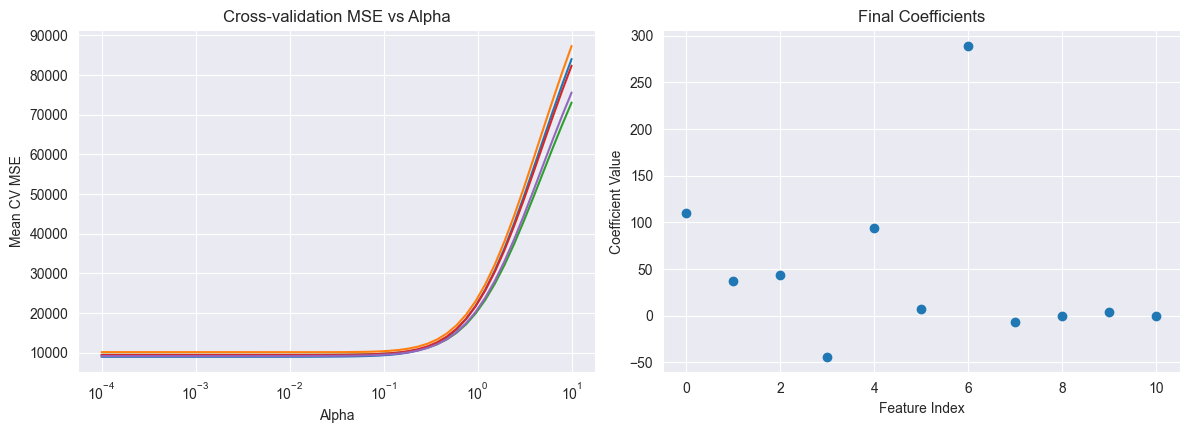

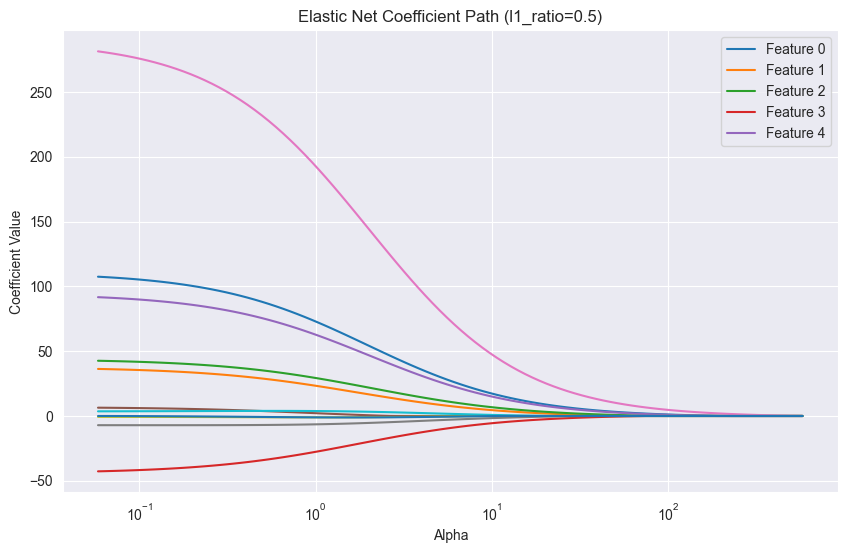

In [122]:
# Split and scale data
X = df1.drop(columns=['sales_revenue'])
y = df1['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different alpha and l1_ratio combinations
alphas = [0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.7, 0.9]

results = []
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Model 
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        # Results
        results.append({
            'alpha': alpha,
            'l1_ratio': l1_ratio,
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'n_nonzero': np.sum(model.coef_ != 0)
        })

# Find best parameters
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['mse'].idxmin()]
print("Best parameters:", best_params)
print('-' *127) 

# Grid Search Cross-Validation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create pipeline with scaling and elastic net
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_net', ElasticNet(random_state=42, max_iter=1000))
])

# Define parameter grid
param_grid = {
    'elastic_net__alpha': np.logspace(-4, 1, 20),  # 20 values from 0.0001 to 10
    'elastic_net__l1_ratio': np.linspace(0.1, 0.9, 9)  # 9 values from 0.1 to 0.9
}

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", -grid_search.best_score_)
print('-' *127)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('-' *127) 

# Random Search for Efficiency
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Define parameter distributions
param_distributions = {
    'elastic_net__alpha': loguniform(1e-4, 10),
    'elastic_net__l1_ratio': uniform(0.1, 0.8)  # 0.1 to 0.9
}

# Random search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV score:", -random_search.best_score_)
print('-' *127) 

# Using ElasticNetCV for Built-in Cross-Validation
from sklearn.linear_model import ElasticNetCV

# ElasticNetCV automatically performs cross-validation
elastic_cv = ElasticNetCV(
    alphas=np.logspace(-4, 1, 50),
    l1_ratio=np.linspace(0.1, 0.9, 9),
    cv=5,
    random_state=42,
    max_iter=1000,
    n_jobs=-1
)

# Fit on scaled data
elastic_cv.fit(X_train_scaled, y_train)

print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)
print('-' *127) 

# Evaluate
y_pred = elastic_cv.predict(X_test_scaled)
print("Test R²:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('-' *127)

# Plot coefficient paths
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
# Fix: Use axis=0 to average across CV folds, not axis=1
plt.semilogx(elastic_cv.alphas_, elastic_cv.mse_path_.mean(axis=0))
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('Cross-validation MSE vs Alpha')

plt.subplot(2, 2, 2)
plt.plot(range(len(elastic_cv.coef_)), elastic_cv.coef_, 'o')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Final Coefficients')

plt.tight_layout()
plt.show() 

"""
# Alternative approach if you want to be more explicit:
mean_mse = np.mean(elastic_cv.mse_path_, axis=0)
plt.semilogx(elastic_cv.alphas_, mean_mse)
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('Cross-validation MSE vs Alpha')

plt.subplot(2, 2, 2)
plt.plot(range(len(elastic_cv.coef_)), elastic_cv.coef_, 'o')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Final Coefficients')

plt.tight_layout()
plt.show() 
""" 

# Advanced Tuning with Custom Scoring
from sklearn.metrics import make_scorer

def custom_score(y_true, y_pred):
    """Custom scoring function combining MSE and sparsity"""
    mse = mean_squared_error(y_true, y_pred)
    return -mse  # Negative because GridSearchCV maximizes

# Custom scorer
custom_scorer = make_scorer(custom_score)

# Grid search with custom scoring
param_grid_advanced = {
    'elastic_net__alpha': np.logspace(-3, 1, 15),
    'elastic_net__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_search_custom = GridSearchCV(
    pipeline,
    param_grid_advanced,
    cv=5,
    scoring=custom_scorer,
    n_jobs=-1
)

grid_search_custom.fit(X_train, y_train)

# Regularization Path Visualization
from sklearn.linear_model import enet_path

# Compute regularization path
alphas, coefs, _ = enet_path(X_train_scaled, y_train, l1_ratio=0.5, eps=1e-4)

# Plot coefficient paths
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[0]):
    plt.semilogx(alphas, coefs[i, :], label=f'Feature {i}' if i < 5 else "")

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Elastic Net Coefficient Path (l1_ratio=0.5)')
plt.legend()
plt.grid(True)
plt.show()

## GradientBoostingRegressor

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best XGBoost parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost score: 11289.786319119437
-------------------------------------------------------------------------------------------------------------------------------
Best LightGBM parameters: {'colsample_bytree': 0.7433862914177091, 'learning_rate': 0.04476071785753891, 'max_depth': 3, 'n_estimators': 427, 'num_leaves': 31, 'reg_alpha': 0.3308980248526492, 'reg_lambda': 0.06355835028602363, 'subsample': 0.7243929286862649}
Best LightGBM score: 11252.89271508941
-------------------------------------------------------------------------------------------------------------------------------
Best GB parameters: OrderedDict([('learning_rate', 0.05599640991641947), ('max_depth', 3), ('max_features', 0.6), ('n_estimators', 253), ('subsample', 0.6)])
Best GB score: 10677.711055646332
-------------------------------------------------------------------------------------

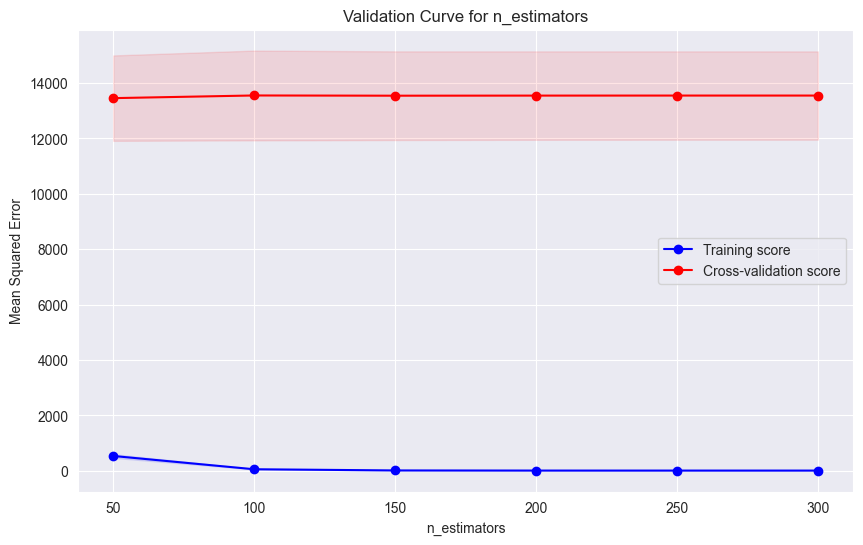

Best iteration: 112
Best score: 111.27829521634912
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


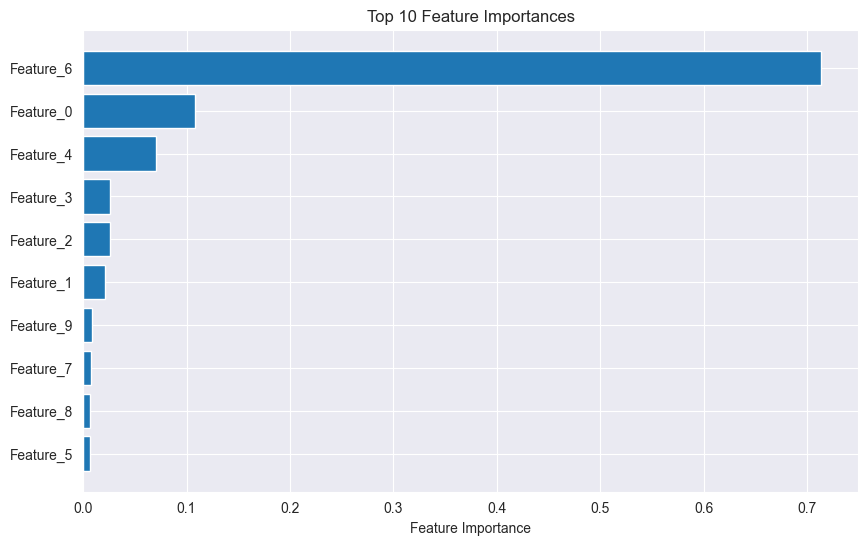

XGBoost Performance:
MSE: 10154.3259
MAE: 80.7786
RMSE: 100.7687
R²: 0.9101
-------------------------------------------------------------------------------------------------------------------------------
LightGBM Performance:
MSE: 10031.3122
MAE: 80.6464
RMSE: 100.1564
R²: 0.9112
-------------------------------------------------------------------------------------------------------------------------------
Gradient Boosting Performance:
MSE: 10021.9589
MAE: 80.8198
RMSE: 100.1097
R²: 0.9113
-------------------------------------------------------------------------------------------------------------------------------
Model Comparison:
                           mse        mae        rmse        r2
XGBoost           10154.325881  80.778578  100.768675  0.910133
LightGBM          10031.312218  80.646448  100.156439  0.911222
GradientBoosting  10021.958902  80.819834  100.109734  0.911304


In [124]:
# 1. Grid Search
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Sample data preparation
X = df1.drop(columns=['sales_revenue'])
y = df1['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# XGBoost parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Grid search
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

print("Best XGBoost parameters:", xgb_grid.best_params_)
print("Best XGBoost score:", -xgb_grid.best_score_)
print('-' *127)

# 2. LightGBM with Randomized Search
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from scipy.stats import uniform, randint

# LightGBM parameter distribution for random search
lgb_params = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Randomized search
lgb_model = lgb.LGBMRegressor(random_state=42, verbose=-1)
lgb_random = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_params,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

lgb_random.fit(X_train, y_train)

print("Best LightGBM parameters:", lgb_random.best_params_)
print("Best LightGBM score:", -lgb_random.best_score_)
print('-' *127) 

# 3. Scikit-learn GradientBoostingRegressor with Bayesian Optimization
from sklearn.ensemble import GradientBoostingRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Bayesian optimization search space
gb_search_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(3, 8),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'max_features': Real(0.6, 1.0)
}

# Bayesian optimization
gb_model = GradientBoostingRegressor(random_state=42)
gb_bayes = BayesSearchCV(
    estimator=gb_model,
    search_spaces=gb_search_space,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

gb_bayes.fit(X_train, y_train)

print("Best GB parameters:", gb_bayes.best_params_)
print("Best GB score:", -gb_bayes.best_score_)
print('-' *127) 

# 4. Manual Hyperparameter Tuning with Validation Curves
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

def plot_validation_curve(estimator, X, y, param_name, param_range, cv=5):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = -test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(param_range, test_mean, 'o-', color='red', label='Cross-validation score')
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
    
    plt.xlabel(param_name)
    plt.ylabel('Mean Squared Error')
    plt.title(f'Validation Curve for {param_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Tuning n_estimators for XGBoost
estimator = xgb.XGBRegressor(random_state=42)
param_range = [50, 100, 150, 200, 250, 300]
plot_validation_curve(estimator, X_train, y_train, 'n_estimators', param_range)

# 5. Early Stopping and Cross-Validation
# XGBoost with early stopping
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

xgb_early = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=4,
    early_stopping_rounds=10,
    random_state=42
)

xgb_early.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val, y_val)],
    verbose=False
)

print(f"Best iteration: {xgb_early.best_iteration}")
print(f"Best score: {xgb_early.best_score}")
print('-' *127) 

# 6. Feature Importance Analysis
def analyze_feature_importance(model, feature_names=None):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(len(importances))]
        
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
        plt.xlabel('Feature Importance')
        plt.title('Top 10 Feature Importances')
        plt.gca().invert_yaxis()
        plt.show()
        
        return feature_importance_df
    else:
        print("Model doesn't have feature_importances_ attribute")
print('-' *127) 
# Use the best model from grid search
best_xgb = xgb_grid.best_estimator_
importance_df = analyze_feature_importance(best_xgb)

# 7. Complete Pipeline with Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print('-' *127)
    
    return {'mse': mse, 'mae': mae, 'rmse': rmse, 'r2': r2}

# Evaluate all tuned models
results = {}
results['XGBoost'] = evaluate_model(xgb_grid.best_estimator_, X_test, y_test, "XGBoost")
results['LightGBM'] = evaluate_model(lgb_random.best_estimator_, X_test, y_test, "LightGBM")
results['GradientBoosting'] = evaluate_model(gb_bayes.best_estimator_, X_test, y_test, "Gradient Boosting")

# Compare results
comparison_df = pd.DataFrame(results).T
print("Model Comparison:")
print(comparison_df)

## Lasso Regression

EXAMPLE 1: Basic Lasso Regression
Mean Squared Error: 9158.9081
Root Mean Squared Error: 95.7022
Mean Absolute Error: 76.5277
R² Score: 0.9216
Coefficients: [  1.18331271   0.74419327  85.21147125  -0.55035557 192.72868847
   0.3380144    9.96408614  -6.06480474  -0.57609257   3.54406517
  -0.        ]
Number of zero coefficients: 1
-------------------------------------------------------------------------------------------------------------------------------
EXAMPLE 2: Feature Selection with Lasso
Selected features: 8 out of 11
Feature indices selected: [0 1 2 3 4 5 6 7]
-------------------------------------------------------------------------------------------------------------------------------
EXAMPLE 3: Optimal Alpha Selection with CV
Optimal alpha: 0.3728
CV Score (R²): 0.9215
Test R² Score: 0.9215
Test MSE Score: 9166.1196
Test MAE Score: 76.4837
Test RMSE Score: 95.7399
--------------------------------------------------------------------------------------------------------------

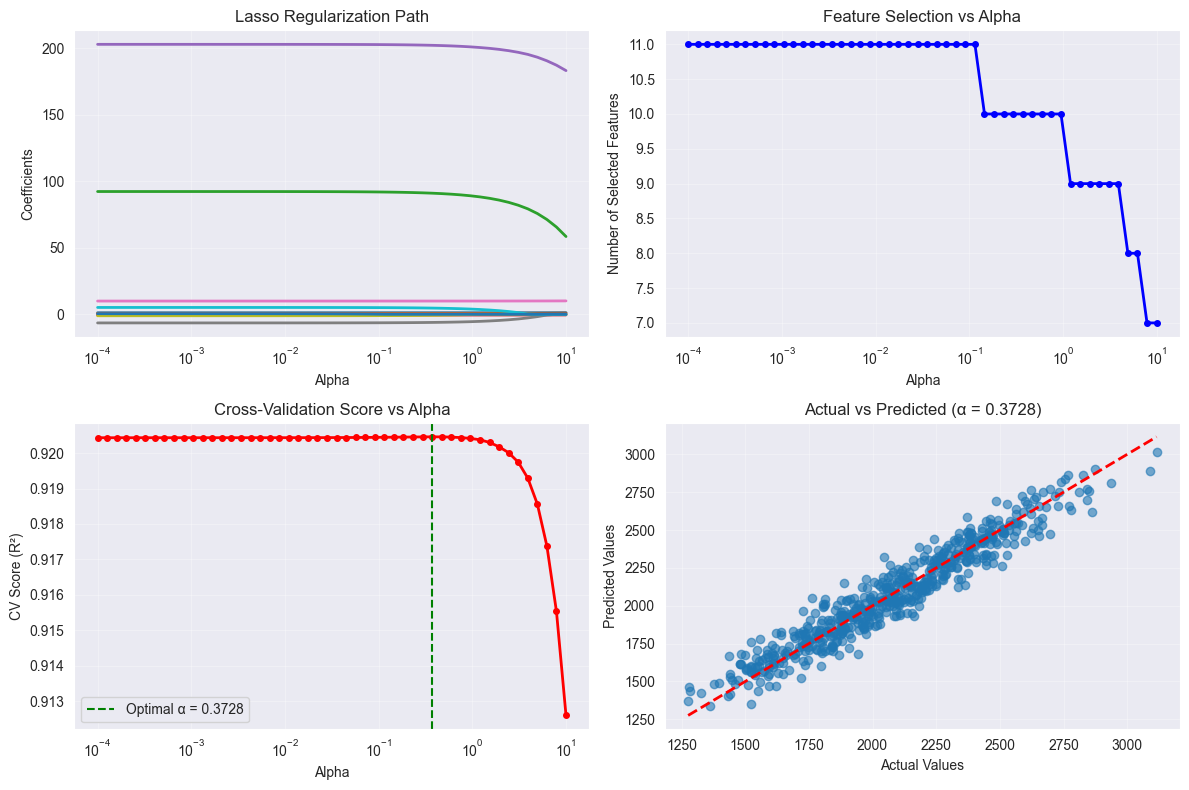

Final Model Comparison:
Linear Regression   : Train R²=0.9215, Test R²=0.9214, Features=11
Ridge (α=1.0)       : Train R²=0.9215, Test R²=0.9214, Features=11
Lasso (α=1.0)       : Train R²=0.9214, Test R²=0.9216, Features=10
Lasso (CV-optimal)  : Train R²=0.9215, Test R²=0.9215, Features=10
-------------------------------------------------------------------------------------------------------------------------------


In [125]:
from sklearn.datasets import make_regression, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Example 1: Basic Lasso Regression
print("EXAMPLE 1: Basic Lasso Regression")

# Generate synthetic data
#X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

X = df1.drop(columns=['sales_revenue'])
y = df1['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit Lasso model
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Coefficients: {lasso.coef_}")
print(f"Number of zero coefficients: {sum(lasso.coef_ == 0)}")
print("-" * 127) 

# Example 2: Feature Selection with Lasso
print("EXAMPLE 2: Feature Selection with Lasso")

# Scale features (recommended for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso with higher alpha for more regularization
lasso_selective = Lasso(alpha=5.0, random_state=42)
lasso_selective.fit(X_train_scaled, y_train)

# Count selected features
selected_features = np.sum(lasso_selective.coef_ != 0)
print(f"Selected features: {selected_features} out of {X.shape[1]}")
print(f"Feature indices selected: {np.where(lasso_selective.coef_ != 0)[0]}")
print("-" * 127) 

# Example 3: Cross-Validation for Alpha Selection
print("EXAMPLE 3: Optimal Alpha Selection with CV")

# Use LassoCV to find optimal alpha
from sklearn.linear_model import Lasso, LassoCV
alphas = np.logspace(-4, 1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

print(f"Optimal alpha: {lasso_cv.alpha_:.4f}")
print(f"CV Score (R²): {lasso_cv.score(X_train, y_train):.4f}")

# Evaluate on test set
y_pred_cv = lasso_cv.predict(X_test)
test_r2 = r2_score(y_test, y_pred_cv)
test_mse = mean_squared_error(y_test, y_pred_cv)
test_mae = mean_absolute_error(y_test, y_pred_cv)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_cv))

print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MSE Score: {test_mse:.4f}")
print(f"Test MAE Score: {test_mae:.4f}")
print(f"Test RMSE Score: {test_rmse:.4f}")
print("-" * 127) 

# Example 4: Comparing Different Alpha Values
print("EXAMPLE 4: Alpha Comparison")

# Test different alpha values
alphas_test = [0.1, 1.0, 10.0, 100.0]
results = []

for alpha in alphas_test:
    lasso_temp = Lasso(alpha=alpha, random_state=42)
    lasso_temp.fit(X_train, y_train)
    
    # Cross-validation score
    cv_scores = cross_val_score(lasso_temp, X_train, y_train, cv=5)
    
    # Test score
    test_score = lasso_temp.score(X_test, y_test)
    
    # Number of selected features
    n_features = np.sum(lasso_temp.coef_ != 0)
    
    results.append({
        'alpha': alpha,
        'cv_score_mean': cv_scores.mean(),
        'cv_score_std': cv_scores.std(),
        'test_score': test_score,
        'n_features': n_features
    })

# Display results
print(f"{'Alpha':<8} {'CV Score':<12} {'Test Score':<12} {'Features':<10}")

for result in results:
    print(f"{result['alpha']:<8} {result['cv_score_mean']:.4f}±{result['cv_score_std']:.3f}  "
          f"{result['test_score']:<12.4f} {result['n_features']:<10}")
print("-" * 127)  

# Example 5: Regularization Path Visualization
print("EXAMPLE 5: Regularization Path")

from sklearn.linear_model import lasso_path

# Compute regularization path
alphas_path, coefs_path, _ = lasso_path(X_train, y_train, alphas=alphas)

# Plot the regularization path
plt.figure(figsize=(12, 8))

# Plot coefficient paths
plt.subplot(2, 2, 1)
for i in range(coefs_path.shape[0]):
    plt.plot(alphas_path, coefs_path[i], linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regularization Path')
plt.grid(True, alpha=0.3)

# Plot number of selected features vs alpha
plt.subplot(2, 2, 2)
n_features_path = [np.sum(coef != 0) for coef in coefs_path.T]
plt.plot(alphas_path, n_features_path, 'bo-', linewidth=2, markersize=4)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Selected Features')
plt.title('Feature Selection vs Alpha')
plt.grid(True, alpha=0.3)

# Plot CV scores vs alpha
plt.subplot(2, 2, 3)
cv_scores_path = []
for alpha in alphas_path:
    lasso_temp = Lasso(alpha=alpha, random_state=42, max_iter=2000)
    scores = cross_val_score(lasso_temp, X_train, y_train, cv=5)
    cv_scores_path.append(scores.mean())

plt.plot(alphas_path, cv_scores_path, 'ro-', linewidth=2, markersize=4)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV Score (R²)')
plt.title('Cross-Validation Score vs Alpha')
plt.grid(True, alpha=0.3)

# Highlight optimal alpha
plt.axvline(x=lasso_cv.alpha_, color='green', linestyle='--', 
           label=f'Optimal α = {lasso_cv.alpha_:.4f}')
plt.legend()

# Plot actual vs predicted for optimal model
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_cv, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (α = {lasso_cv.alpha_:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final comparison with different models
print("Final Model Comparison:")

from sklearn.linear_model import LinearRegression, Ridge

models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Lasso (α=1.0)': Lasso(alpha=1.0, random_state=42),
    'Lasso (CV-optimal)': lasso_cv
}

for name, model in models.items():
    if name != 'Lasso (CV-optimal)':  # Already fitted
        model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    if hasattr(model, 'coef_'):
        n_features = np.sum(model.coef_ != 0) if hasattr(model, 'coef_') else X_train.shape[1]
    else:
        n_features = X_train.shape[1]
    
    print(f"{name:<20}: Train R²={train_score:.4f}, Test R²={test_score:.4f}, Features={n_features}")
    
print("-" * 127)

## LinearRegression

Dataset shape: (1908, 11)
Feature names: Index(['production_cost', 'marketing_spend', 'seasonal_demand_index', 'competitor_price', 'customer_rating', 'economic_index', 'store_count', 'product_category_encoded', 'region_encoded', 'customer_segment_encoded', 'promotion_applied_encoded'], dtype='object')
-------------------------------------------------------------------------------------------------------------------------------
=== Linear Regression Tuning Examples ===
=== Feature Correlation Analysis ===


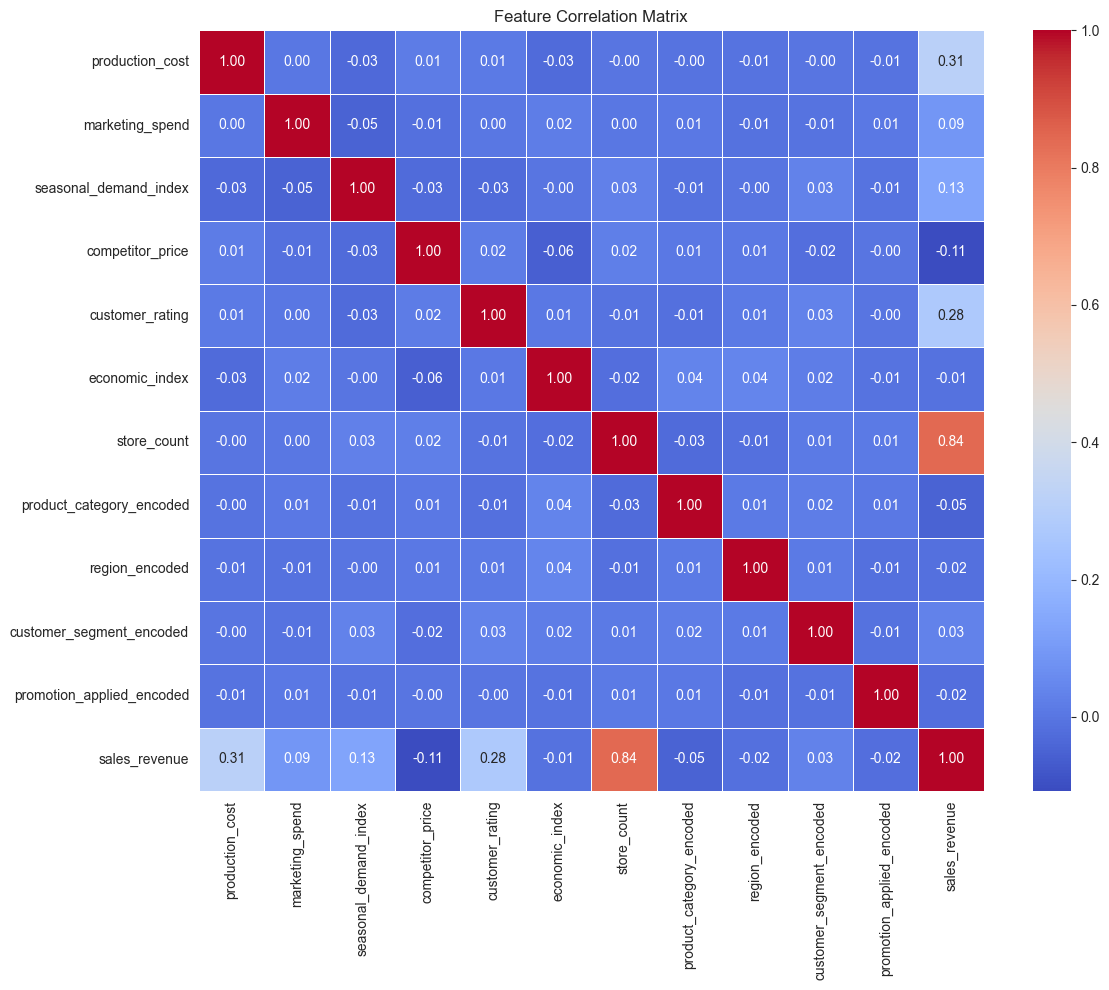

Feature correlation with target (sales_revenue):
sales_revenue                1.000000
store_count                  0.841188
production_cost              0.314750
customer_rating              0.276044
seasonal_demand_index        0.133538
marketing_spend              0.089986
customer_segment_encoded     0.032555
economic_index              -0.008674
region_encoded              -0.015413
promotion_applied_encoded   -0.018777
product_category_encoded    -0.047786
competitor_price            -0.108094
Name: sales_revenue, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
=== Cross-Validation ===
Cross-Validation MSE: 9377.4236 ± 456.9442
Cross-Validation MAE: 77.2042 ± 1.2503
Cross-Validation R²: 0.9206 ± 0.0049
-------------------------------------------------------------------------------------------------------------------------------
=== Basic Linear Regression ===
MSE test set: 9031.1091
MSE

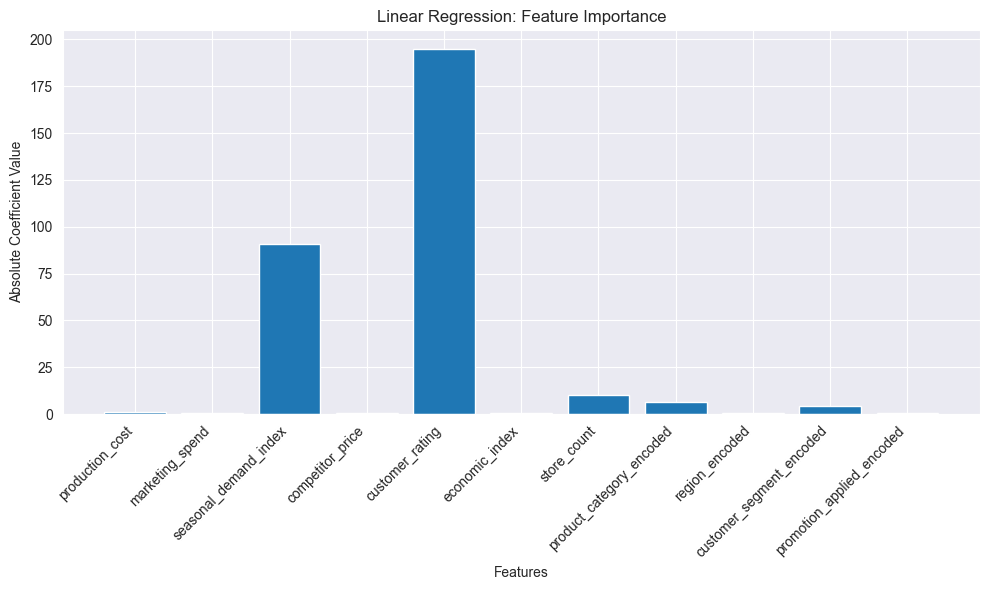

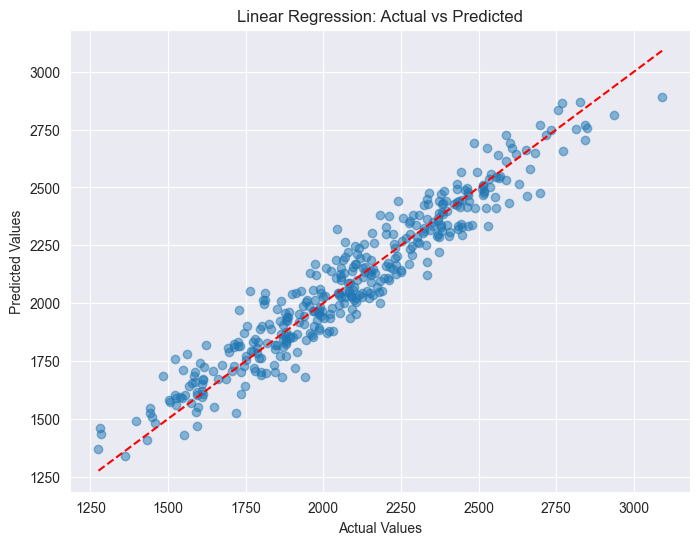

=== Scaled Linear Regression ===
MSE test set: 9031.1091
MSE train set: 9339.5613

R² Score test: 0.9201
R² Score train: 0.9220

MAE test set: 76.2272
MAE train set: 76.9125

Selected Features Coef_: ['production_cost' 'marketing_spend' 'seasonal_demand_index'
 'competitor_price' 'customer_rating' 'economic_index' 'store_count'
 'product_category_encoded' 'region_encoded' 'customer_segment_encoded'
 'promotion_applied_encoded']
-------------------------------------------------------------------------------------------------------------------------------


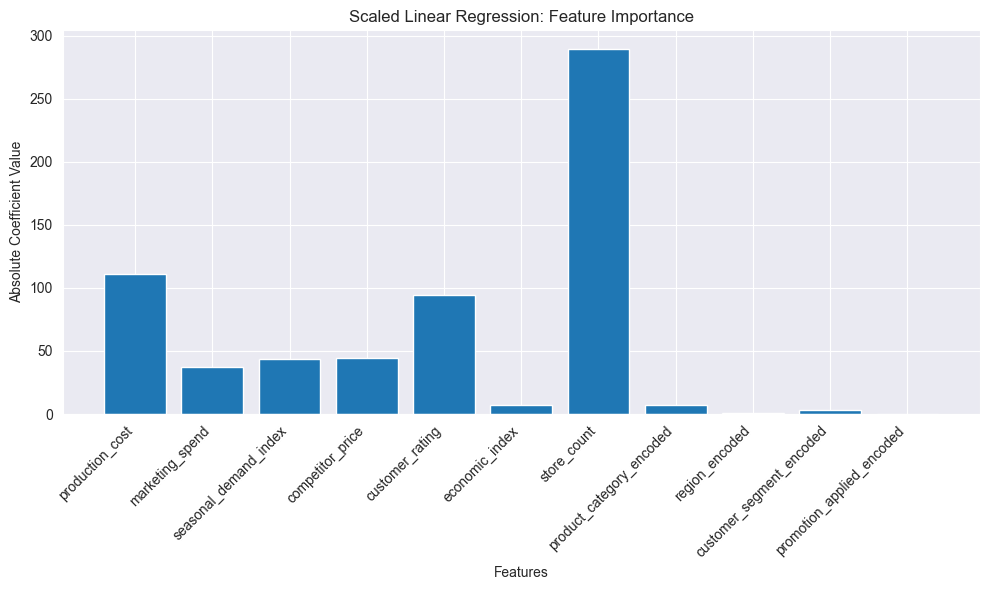

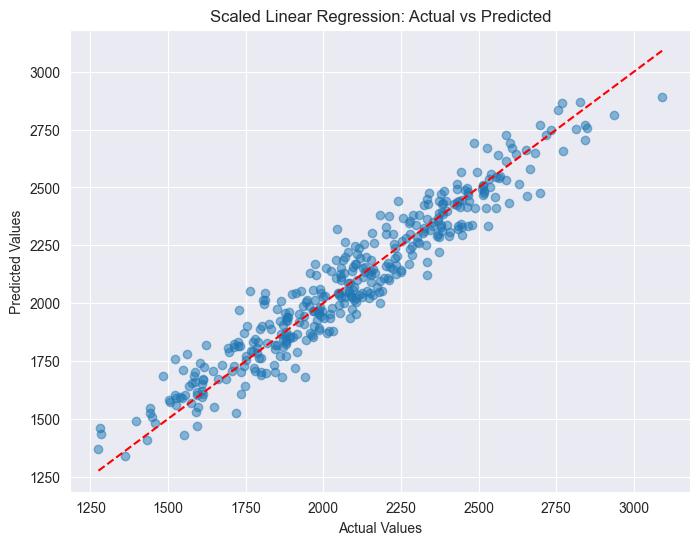

=== Feature Selection (SelectKBest) ===
MSE test set: 10867.3276
MSE train set: 10847.5750

R² Score test: 0.9038
R² Score train: 0.9094

MAE test set: 83.2409
MAE train set: 82.4803

Selected Features Selector : ['production_cost' 'seasonal_demand_index' 'competitor_price'
 'customer_rating' 'store_count']
-------------------------------------------------------------------------------------------------------------------------------


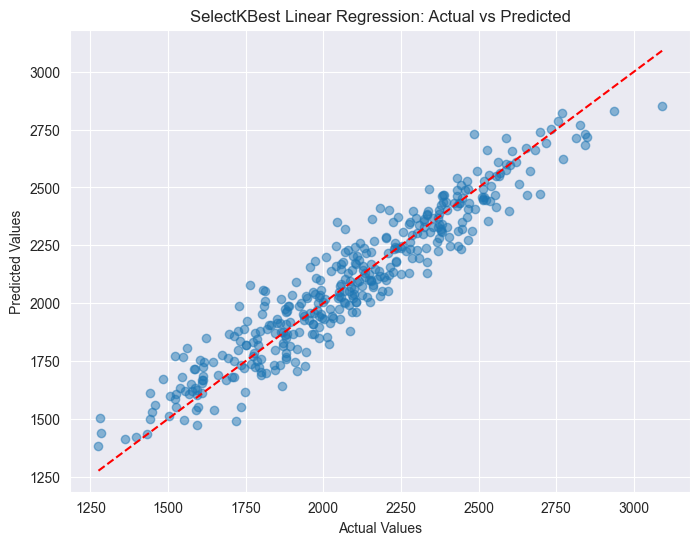

=== Feature Selection (RFE) ===
MSE test set: 10867.3276
MSE train set: 10847.5750

R² Score test: 0.9038
R² Score train: 0.9094

MAE test set: 83.2409
MAE train set: 82.4803

Selected Features Selector : ['production_cost' 'seasonal_demand_index' 'competitor_price'
 'customer_rating' 'store_count']
-------------------------------------------------------------------------------------------------------------------------------


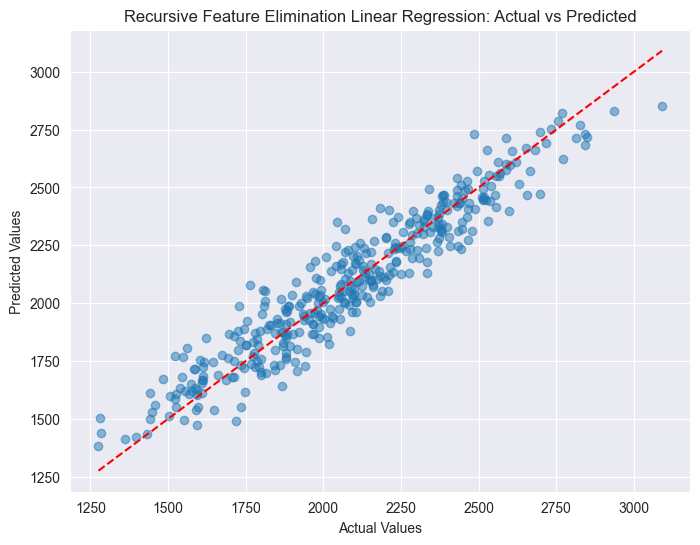

=== Polynomial Regression ===
MSE test set: 9554.7975
MSE train set: 8908.1873

R² Score test: 0.9154
R² Score train: 0.9256

MAE test set: 77.9742
MAE train set: 75.6132
-------------------------------------------------------------------------------------------------------------------------------


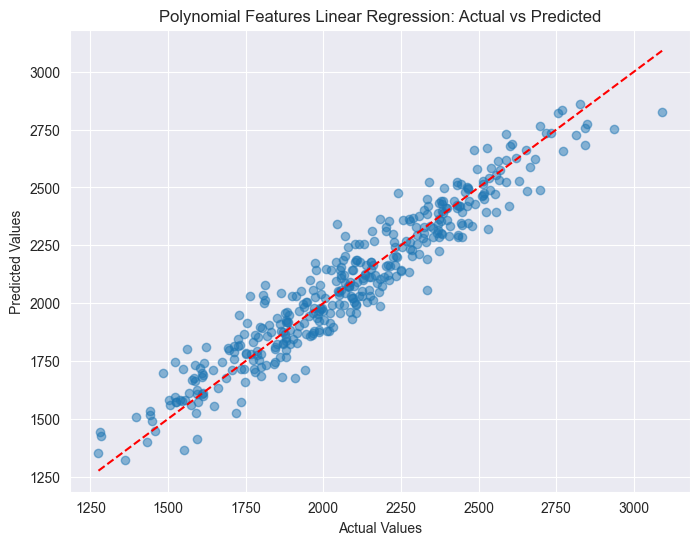

=== Ridge Regression ===
MSE test set:  9031.5867
MSE train set: 9339.6089

R² Score test: 0.9201
R² Score train:0.9220

MAE test set:  76.2259
MAE train set: 76.9130

Best alpha:    1.0000

Selected Features Coef_: ['production_cost' 'marketing_spend' 'seasonal_demand_index'
 'competitor_price' 'customer_rating' 'economic_index' 'store_count'
 'product_category_encoded' 'region_encoded' 'customer_segment_encoded'
 'promotion_applied_encoded']
-------------------------------------------------------------------------------------------------------------------------------


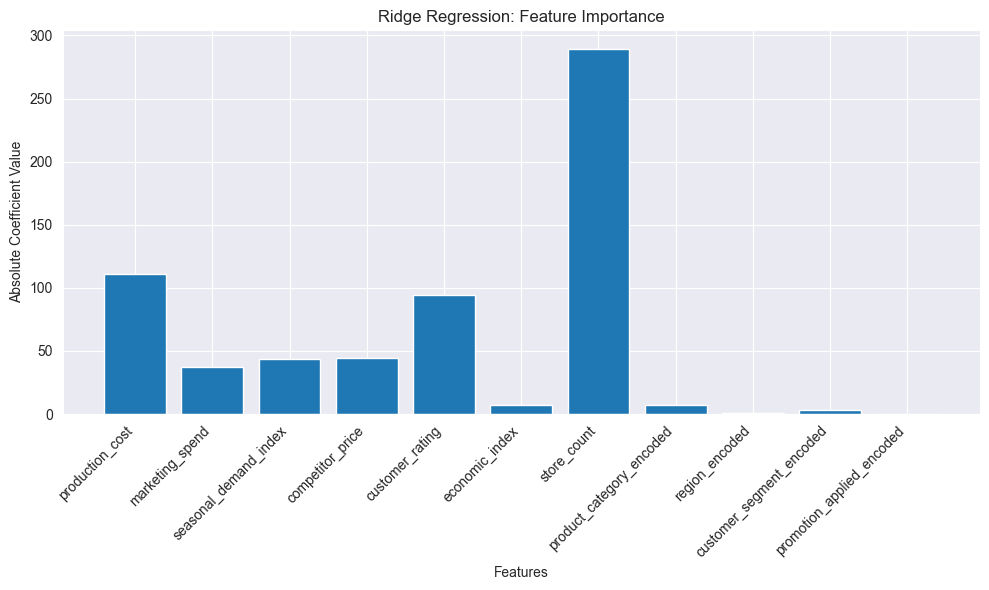

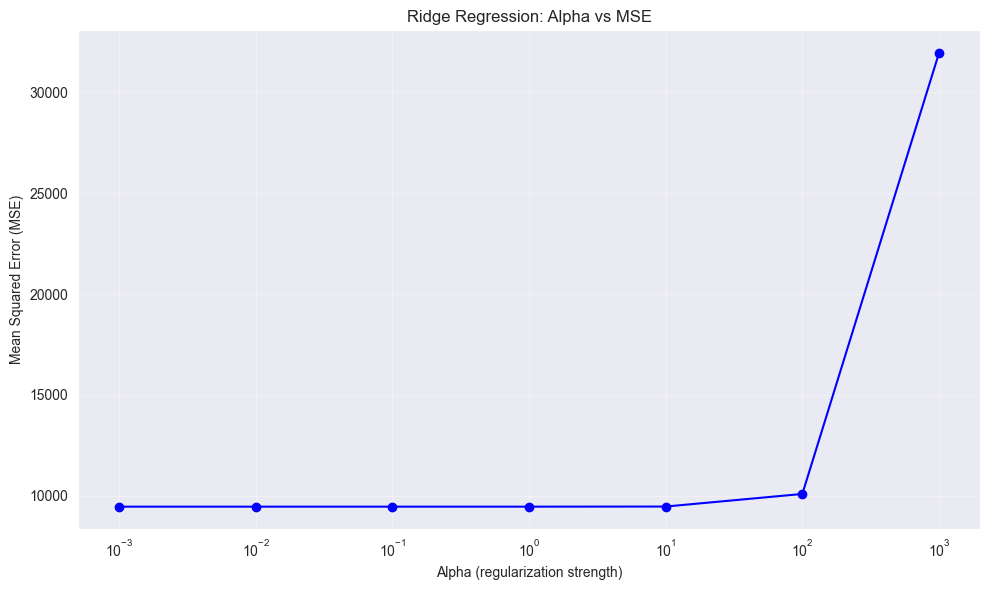

=== Lasso Regression ===
MSE test set: 9023.9883
MSE train set: 9348.9455

R² Score test: 0.9201
R² Score train: 0.9219

MAE test set: 76.2671
MAE train set: 76.8947

Best alpha: 1.0

Selected features: ['production_cost' 'marketing_spend' 'seasonal_demand_index'
 'competitor_price' 'customer_rating' 'economic_index' 'store_count'
 'product_category_encoded' 'customer_segment_encoded']
-------------------------------------------------------------------------------------------------------------------------------


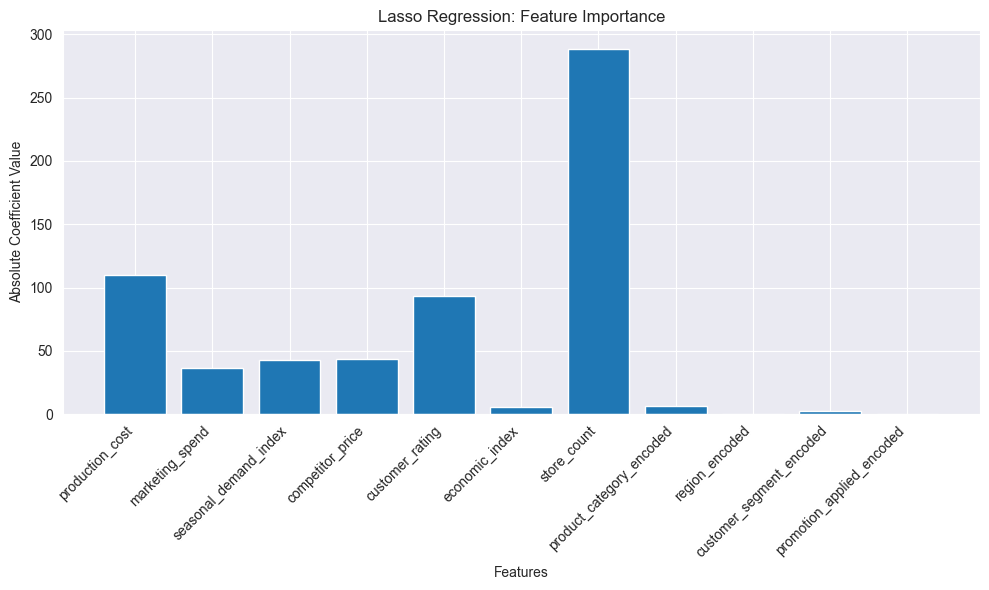

=== Elastic Net Regression ===
MSE test set: 9030.6888
MSE train set: 9339.9119

R² Score test: 0.9201
R² Score train: 0.9220

MAE test set: 76.2221
MAE train set: 76.9085

Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.99}

Selected Features Coef_: ['production_cost' 'marketing_spend' 'seasonal_demand_index'
 'competitor_price' 'customer_rating' 'economic_index' 'store_count'
 'product_category_encoded' 'region_encoded' 'customer_segment_encoded'
 'promotion_applied_encoded']
-------------------------------------------------------------------------------------------------------------------------------


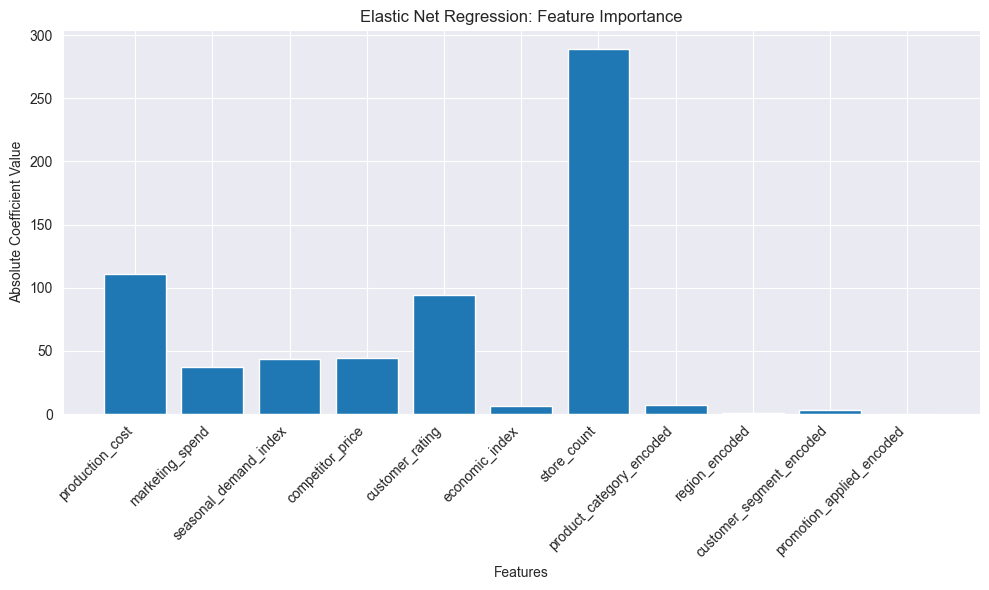

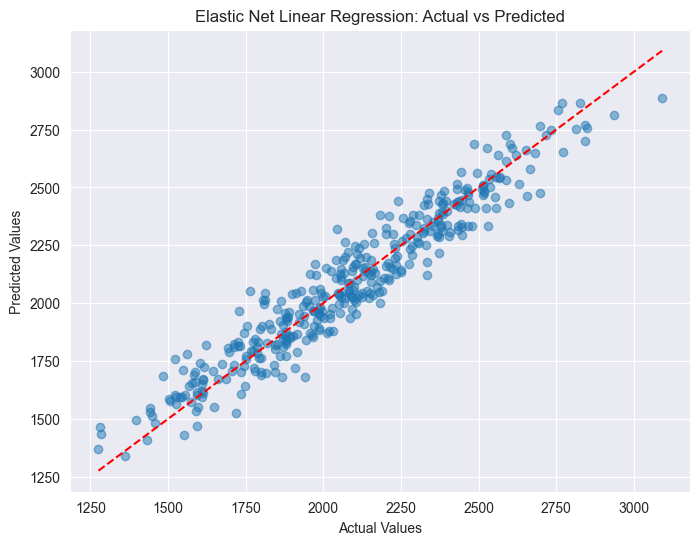

=== Model Comparison ===
                                    MAE       MSE         R²
Feature Selection (KBest)  10867.327557  0.903823  83.240936
Feature Selection (RFE)    10867.327557  0.903823  83.240936
Polynomial Regression       9554.797546  0.915439  77.974183
Ridge Regression            9031.586661  0.920069  76.225884
Scaled Linear Regression    9031.109132  0.920073  76.227237
Basic Linear Regression     9031.109132  0.920073  76.227237
Elastic Net                 9030.688786  0.920077  76.222058
Lasso Regression            9023.988293  0.920136  76.267088
-------------------------------------------------------------------------------------------------------------------------------


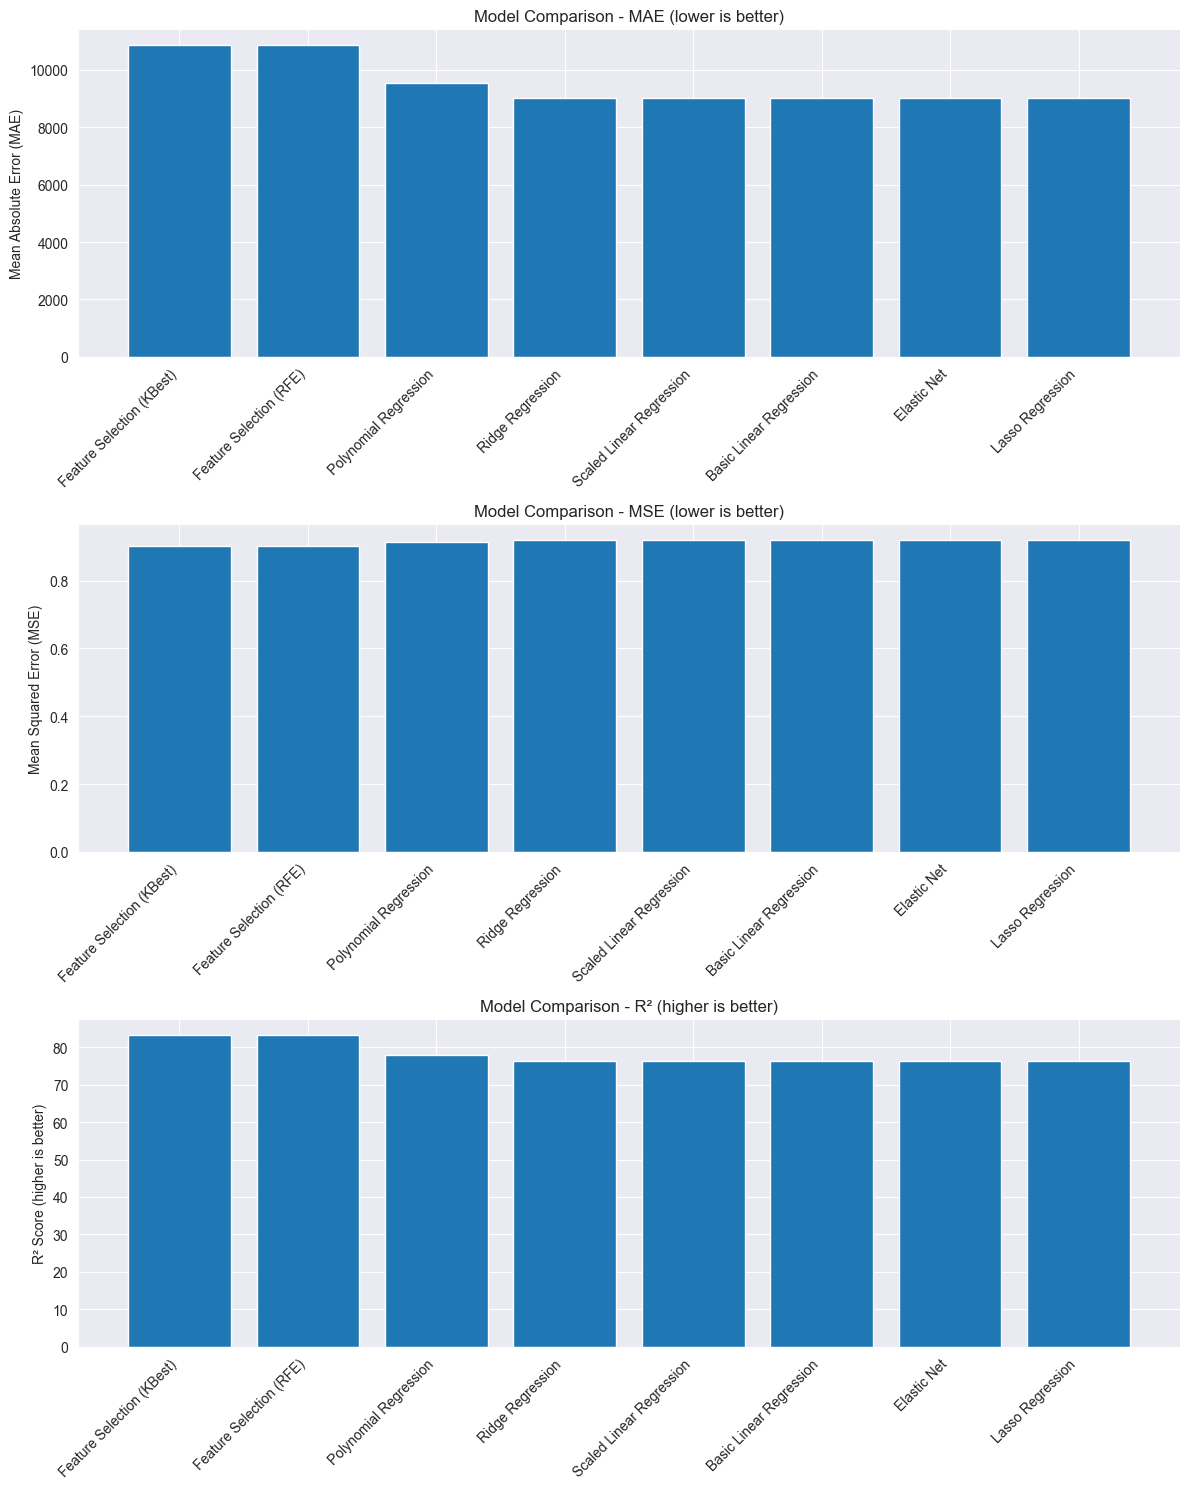

Best model according to MAE: Feature Selection (KBest)
Best model according to MSE: Feature Selection (KBest)
Best model according to RMSE: Feature Selection (KBest)
Best model according to R2_score: Feature Selection (KBest)
-------------------------------------------------------------------------------------------------------------------------------


In [164]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
X = df1.drop(columns=['sales_revenue'])
y = df1['sales_revenue']

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print("-" * 127)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic Linear Regression model
def basic_linear_regression():
    print("=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 
    print("-" * 127) 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")
  
    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}") 
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best parameters: {grid_search.best_params_}")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    print("=" * 127) 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("-" * 127)
    print("=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(mse_scores)
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print("-" * 127) 
    
    return mse_scores, mae_scores, r2_scores, rmse_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }
    
    # Extract MSE and R² scores
    results = {name: {'MAE': mae_scores, 'MSE': mse_scores, 'R²': r2_scores} 
           for name, (_, mae_scores, mse_scores, r2_scores) in models.items()} 
    
    # Extract MSE and R² scores
    #results = {name: {'MAE': mae_scores, 'MSE': mse_scores, 'RMSE': rmse_scores, 'R²': r2_scores} for name, (_, mae_scores, mse_scores, rmse_scores, r2_scores) in models.items()}
    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE')
    
    print("=== Model Comparison ===")
    print(results_df)
    print("-" * 127) 
    
    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots

    plt.subplot(3, 1, 1)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')
    
    plt.subplot(3, 1, 2)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')
    
    plt.subplot(3, 1, 3)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.tight_layout()
    plt.show()

    return results_df 
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(df1, columns=X_train.columns)  # Always change the df value based on the df's name you're using
    X_df['sales_revenue'] = y_train  # Always change the X_df value 
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['sales_revenue'].sort_values(ascending=False) # Always change the target_coor value 
    print("Feature correlation with target (sales_revenue):")  # Always change the variable value 
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MAE: {results.index[0]}")
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to RMSE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print("-" * 127)

## Neural Network Regression

EXAMPLE 1: Simple Regression with Synthetic Data
Mean Absolute Error: 102.2833
Mean Squared Error: 16605.2169
Root Mean Squared Error: 128.8612
R² Score: 0.8530
Training R² Score: 0.9951
Number of iterations: 304
-------------------------------------------------------------------------------------------------------------------------------
EXAMPLE 2: Non-linear Function Approximation
Non-linear MAE: 0.0778
Non-linear MSE: 0.0096
Non-linear R²: 0.9841
Non-linear RMSE: 0.0980
-------------------------------------------------------------------------------------------------------------------------------


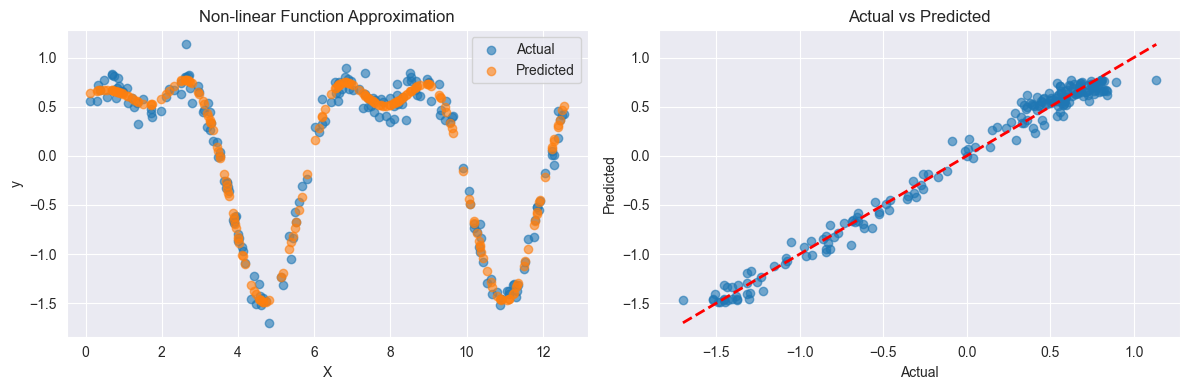

EXAMPLE 3: Diabetes Dataset Regression
Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Diabetes MAE: 45.1040
Diabetes MSE: 3016.1607
Diabetes RMSE: 54.9196
Diabetes R²: 0.4307
Training stopped at iteration: 59
-------------------------------------------------------------------------------------------------------------------------------
EXAMPLE 4: Hyperparameter Tuning
Fitting 5 folds for each of 48 candidates, totalling 240 fits


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.dispose_and_kill_a

KeyboardInterrupt: 

In [170]:
# MLPRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression, load_diabetes
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Example 1: Simple Regression with Synthetic Data
print("EXAMPLE 1: Simple Regression with Synthetic Data")

# Dataset
X = df1.drop(columns=['sales_revenue'])
y = df1['sales_revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features (crucial for neural networks)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).ravel()

# Create and train the neural network regressor
mlp_basic = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Two hidden layers
    activation='relu',             # ReLU activation
    solver='adam',                 # Adam optimizer
    alpha=0.001,                   # L2 regularization
    learning_rate='constant',      # Learning rate schedule
    learning_rate_init=0.001,      # Initial learning rate
    max_iter=500,                  # Maximum iterations
    random_state=42
)

# Train the model
mlp_basic.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_pred_scaled = mlp_basic.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}") 
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Training R² Score: {mlp_basic.score(X_train_scaled, y_train_scaled):.4f}")
print(f"Number of iterations: {mlp_basic.n_iter_}")
print('-' * 127)  

# Example 2: Non-linear Function Approximation
print("EXAMPLE 2: Non-linear Function Approximation")

# Generate non-linear function data
X_nonlinear = np.linspace(0, 4*np.pi, 1000).reshape(-1, 1)
y_nonlinear = np.sin(X_nonlinear).ravel() + 0.5 * np.cos(2 * X_nonlinear).ravel() + 0.1 * np.random.randn(1000)

# Split the data
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=42
)

# Scale the data
scaler_X_nl = StandardScaler()
X_train_nl_scaled = scaler_X_nl.fit_transform(X_train_nl)
X_test_nl_scaled = scaler_X_nl.transform(X_test_nl)

# Create neural network for non-linear regression
mlp_nonlinear = MLPRegressor(
    hidden_layer_sizes=(50, 50, 25),  # Three hidden layers
    activation='tanh',                 # Tanh activation for smooth functions
    solver='lbfgs',                   # L-BFGS for small datasets
    alpha=0.01,                       # Regularization
    max_iter=1000,
    random_state=42
)

# Train the model
mlp_nonlinear.fit(X_train_nl_scaled, y_train_nl)

# Make predictions
y_pred_nl = mlp_nonlinear.predict(X_test_nl_scaled)

# Evaluate
print(f"Non-linear MAE: {mean_absolute_error(y_test_nl, y_pred_nl):.4f}")
print(f"Non-linear MSE: {mean_squared_error(y_test_nl, y_pred_nl):.4f}")
print(f"Non-linear R²: {r2_score(y_test_nl, y_pred_nl):.4f}")
print(f"Non-linear RMSE: {np.sqrt(mean_squared_error(y_test_nl, y_pred_nl)):.4f}")
print('-' * 127)  

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_test_nl, y_test_nl, alpha=0.6, label='Actual')
plt.scatter(X_test_nl, y_pred_nl, alpha=0.6, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Function Approximation')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_nl, y_pred_nl, alpha=0.6)
plt.plot([y_test_nl.min(), y_test_nl.max()], [y_test_nl.min(), y_test_nl.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

# Example 3: Real Dataset - Diabetes Regression
print("EXAMPLE 3: Diabetes Dataset Regression")

# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target

print(f"Dataset shape: {X_diabetes.shape}")
print(f"Feature names: {diabetes.feature_names}")

# Split the data
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Scale the features
scaler_diab = StandardScaler()
X_train_diab_scaled = scaler_diab.fit_transform(X_train_diab)
X_test_diab_scaled = scaler_diab.transform(X_test_diab)

# Create neural network
mlp_diabetes = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    learning_rate_init=0.01,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42
)

# Train the model
mlp_diabetes.fit(X_train_diab_scaled, y_train_diab)

# Make predictions
y_pred_diab = mlp_diabetes.predict(X_test_diab_scaled)

# Evaluate
mae_diab = mean_absolute_error(y_test_diab, y_pred_diab)
mse_diab = mean_squared_error(y_test_diab, y_pred_diab)
rmse_diab = np.sqrt(mse_diab)
r2_diab = r2_score(y_test_diab, y_pred_diab)

print(f"Diabetes MAE: {mae_diab:.4f}")
print(f"Diabetes MSE: {mse_diab:.4f}") 
print(f"Diabetes RMSE: {rmse_diab:.4f}")
print(f"Diabetes R²: {r2_diab:.4f}")
print(f"Training stopped at iteration: {mlp_diabetes.n_iter_}")
print('-' * 127) 

# Example 4: Hyperparameter Tuning for Regression
print("EXAMPLE 4: Hyperparameter Tuning")

# Define parameter grid for regression
param_grid_reg = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01]
}

# Create MLPRegressor for grid search
mlp_grid_reg = MLPRegressor(
    solver='adam',
    max_iter=50000,
    random_state=42
)

# Perform grid search
grid_search_reg = GridSearchCV(
    mlp_grid_reg,
    param_grid_reg,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit on diabetes data
grid_search_reg.fit(X_train_diab_scaled, y_train_diab)

print(f"Best parameters: {grid_search_reg.best_params_}")
print(f"Best CV score (neg MSE): {grid_search_reg.best_score_:.4f}")

# Test the best model
best_mlp_reg = grid_search_reg.best_estimator_
y_pred_best_reg = best_mlp_reg.predict(X_test_diab_scaled)
print(f"Test R² with best model: {r2_score(y_test_diab, y_pred_best_reg):.4f}")
print('-' * 127) 

# Example 5: Multi-output Regression
print("EXAMPLE 5: Multi-output Regression")

# Generate multi-output regression data
X_multi, y_multi = make_regression(
    n_samples=1000,
    n_features=10,
    n_targets=3,  # Multiple outputs
    noise=0.1,
    random_state=42
)

print(f"Multi-output data shape: X={X_multi.shape}, y={y_multi.shape}")
print('-' * 127)  

# Split and scale
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

scaler_X_multi = StandardScaler()
X_train_multi_scaled = scaler_X_multi.fit_transform(X_train_multi)
X_test_multi_scaled = scaler_X_multi.transform(X_test_multi)

# Create multi-output neural network
mlp_multi = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=50000,
    random_state=42
)

# Train
mlp_multi.fit(X_train_multi_scaled, y_train_multi)

# Predict
y_pred_multi = mlp_multi.predict(X_test_multi_scaled)

# Evaluate each output
for i in range(y_multi.shape[1]):
    r2_output = r2_score(y_test_multi[:, i], y_pred_multi[:, i])
    mse_output = mean_squared_error(y_test_multi[:, i], y_pred_multi[:, i])
    print(f"Output {i+1} - R²: {r2_output:.4f}, MSE: {mse_output:.4f}")
print('-' * 127)  

# Example 6: Learning Curves and Model Complexity
print("EXAMPLE 6: Learning Curves Analysis")

# Create models with different complexities
models = {
    'Simple (10 neurons)': MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42),
    'Medium (50, 25)': MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42),
    'Complex (100, 50, 25)': MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=1000, random_state=42)
}

plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    # Generate learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_diab_scaled, y_train_diab, 
        cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = -val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    plt.subplot(1, 3, i)
    plt.plot(train_sizes, train_mean, 'o-', label='Training MSE')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, val_mean, 'o-', label='Validation MSE')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{name}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Example 7: Feature Engineering with Polynomial Features
print("EXAMPLE 7: Feature Engineering with Polynomial Features")

# Create simple dataset
X_simple = np.random.randn(500, 2)
y_simple = X_simple[:, 0]**2 + X_simple[:, 1]**2 + 0.1*np.random.randn(500)

# Split data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Compare with and without polynomial features
results_comparison = {}

# Without polynomial features
scaler_simple = StandardScaler()
X_train_simple_scaled = scaler_simple.fit_transform(X_train_simple)
X_test_simple_scaled = scaler_simple.transform(X_test_simple)

mlp_simple = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
mlp_simple.fit(X_train_simple_scaled, y_train_simple)
y_pred_simple = mlp_simple.predict(X_test_simple_scaled)
results_comparison['Without Poly'] = r2_score(y_test_simple, y_pred_simple)

# With polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_simple)
X_test_poly = poly.transform(X_test_simple)

scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

mlp_poly = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
mlp_poly.fit(X_train_poly_scaled, y_train_simple)
y_pred_poly = mlp_poly.predict(X_test_poly_scaled)
results_comparison['With Poly'] = r2_score(y_test_simple, y_pred_poly)

print("Feature Engineering Comparison:")
for method, r2 in results_comparison.items():
    print(f"{method:15}: R² = {r2:.4f}")
print('-' * 127) 

# Example 8: Regularization Effects
print("EXAMPLE 8: Regularization Effects")

alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
reg_results = {}

for alpha in alphas:
    mlp_reg = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        alpha=alpha,
        max_iter=10000,
        random_state=42
    )
    
    mlp_reg.fit(X_train_diab_scaled, y_train_diab)
    y_pred_reg = mlp_reg.predict(X_test_diab_scaled)
    
    train_r2 = mlp_reg.score(X_train_diab_scaled, y_train_diab)
    test_r2 = r2_score(y_test_diab, y_pred_reg)
    
    reg_results[alpha] = {'train_r2': train_r2, 'test_r2': test_r2}
    
    print(f"Alpha {alpha:6.4f}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

print('-' * 127) 

# Example 9: Residual Analysis
print("EXAMPLE 9: Residual Analysis")

# Calculate residuals
residuals = y_test_diab - y_pred_diab

print(f"Residual Statistics:")
print(f"Mean: {np.mean(residuals):.4f}")
print(f"Std: {np.std(residuals):.4f}")
print(f"Min: {np.min(residuals):.4f}")
print(f"Max: {np.max(residuals):.4f}")
print('-' * 127) 

# Plot residuals
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_diab, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 3, 2)
plt.hist(residuals, bins=20, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

## Ridge

Best alpha: 1.1288378916846884
-------------------------------------------------------------------------------------------------------------------------------
Dataset shape: (1908, 11)
Feature names: Index(['production_cost', 'marketing_spend', 'seasonal_demand_index', 'competitor_price', 'customer_rating', 'economic_index', 'store_count', 'product_category_encoded', 'region_encoded', 'customer_segment_encoded', 'promotion_applied_encoded'], dtype='object')
-------------------------------------------------------------------------------------------------------------------------------
R² Score: 0.92
Mean Absolute Error: 76.25
Mean Squared Error: 9034.79
Root Mean Squared Error: 95.05
Ridge coefficient: 1.19
Ridge intercept: 62.69
-------------------------------------------------------------------------------------------------------------------------------
Linear Regression Coefficients:
 [  1.18825038   0.77582174  90.90896302  -0.55652908 195.08208324
   0.37096721   9.9334722   -6.3834

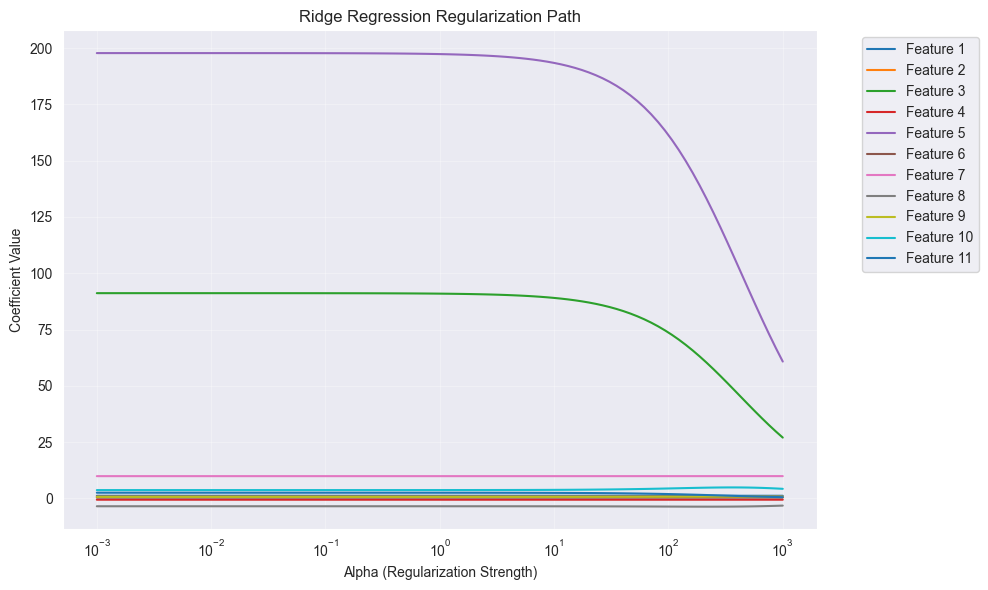

Alpha	MSE	R²	Sum of coefficients
0.1	9031.15	0.920	638.62
1.0	9031.59	0.920	638.24
10.0	9039.88	0.920	634.46
100.0	9470.13	0.916	599.48
-------------------------------------------------------------------------------------------------------------------------------
Manual Ridge Coefficients:
Intercept: 1.293
Slopes: [27.77594231 73.31117902 18.4856534 ]
Sklearn Ridge Intercept: 1.293
Sklearn Ridge Slopes: [27.77594231 73.31117902 18.4856534 ]


In [174]:
# Ridge Regression
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}")
    print(f"Best alpha: {grid_search.best_params_['ridge__alpha']:.4f}")
    
    # Visualize alpha vs MSE (with error handling)
    if show_plot:
        try:
            plt.figure(figsize=(10, 6))
            results = pd.DataFrame(grid_search.cv_results_)
            alphas = np.array(param_grid['ridge__alpha'])
            scores = -results['mean_test_score']
            plt.semilogx(alphas, scores, 'b-o')
            plt.xlabel('Alpha (regularization strength)')
            plt.ylabel('Mean Squared Error (MSE)')
            plt.title('Ridge Regression: Alpha vs MSE')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            plt.close()
        except Exception as e:
            print(f"Could not display plot: {e}")
    
    return best_model, mse_test, r2_test, mae_test

## Ridge Regression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# It's crucial to standardize features before regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# RidgeCV automatically selects the best alpha
alphas = np.logspace(-4, 3, 20)
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print(f"Best alpha: {ridge_cv.alpha_}")
print('-' *127)

## Ridge Regression Tuning ##

# Basic Ridge Regression with scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
X = df1.drop(columns=['sales_revenue'])
y = df1['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print("-" * 127)

# Create Ridge regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Ridge coefficient: {ridge.coef_[0]:.2f}")
print(f"Ridge intercept: {ridge.intercept_:.2f}")
print("-" * 127) 

#Comparing Ridge with Regular Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Compare coefficients
print(f"Linear Regression Coefficients:\n {lr.coef_}\n")
print(f"Ridge Regression Coefficients:\n {ridge.coef_}\n")
print(f"Linear Regression R2: {r2_score(y_test, lr_pred):.2f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, lr_pred):.2f}")
print(f"Ridge Regression R2: {r2_score(y_test, ridge_pred):.2f}")
print(f"Ridge Regression MSE: {mean_squared_error(y_test, ridge_pred):.2f}")
print("-" * 127)  

#Finding Optimal Alpha with Cross-Validation
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

# RidgeCV automatically finds the best alpha using cross-validation
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print(f"Best alpha: {ridge_cv.alpha_}")
print(f"Best cross-validation score: {ridge_cv.best_score_:.3f}")

# Use the best model for prediction
y_pred = ridge_cv.predict(X_test)
print(f"Ridge Test R² score: {r2_score(y_test, y_pred):.3f}")
print('-' *127)

#Visualizing Regularization Path
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Test different alpha values
alphas = np.logspace(-3, 3, 100)
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

# Plot regularization path
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Regularization Path')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Standardize features (important for Ridge regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare different alpha values
alphas = [0.1, 1.0, 10.0, 100.0]
results = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    
    results[alpha] = {
        'mse': mean_squared_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'coef_sum': np.sum(np.abs(ridge.coef_))
    }

# Display results
print("Alpha\tMSE\tR²\tSum of coefficients")
for alpha, metrics in results.items():
    print(f"{alpha}\t{metrics['mse']:.2f}\t{metrics['r2']:.3f}\t{metrics['coef_sum']:.2f}")
print('-' *127) 

# Manual Implementation of Ridge Regression
def ridge_regression(X, y, alpha):
    """
    Manual implementation of Ridge Regression using normal equation
    """
    # Add bias term
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    n_features = X_with_bias.shape[1]
    
    # Create regularization matrix (don't regularize bias term)
    I = np.eye(n_features)
    I[0, 0] = 0  # Don't regularize intercept
    
    # Ridge regression formula: (X'X + αI)^(-1)X'y
    coefficients = np.linalg.inv(X_with_bias.T @ X_with_bias + alpha * I) @ X_with_bias.T @ y
    
    return coefficients

# Example usage
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
coefficients = ridge_regression(X, y, alpha=1.0)

print("Manual Ridge Coefficients:")
print(f"Intercept: {coefficients[0]:.3f}")
print(f"Slopes: {coefficients[1:]}")

# Compare with sklearn
ridge_sklearn = Ridge(alpha=1.0)
ridge_sklearn.fit(X, y)
print(f"Sklearn Ridge Intercept: {ridge_sklearn.intercept_:.3f}")
print(f"Sklearn Ridge Slopes: {ridge_sklearn.coef_}")

## XGBRegressor

In [176]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load the dataset
X = df1.drop(columns=['sales_revenue'])
y = df1['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
  
# XGBoost with advanced parameters
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1.0, 10.0],
    'reg_lambda': [0.1, 1.0, 10.0],
    'tree_method': ['hist'],
    'grow_policy': ['depthwise', 'lossguide']
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# For very large parameter spaces, use random search first
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_params,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)
y_pred_train = random_search.predict(X_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", random_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_search.best_score_)))

print(f"Test MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}\n")

print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train)}\n")

print(f"Test R2: {r2_score(y_test, y_pred)}")
print(f"Train R2: {r2_score(y_train, y_pred_train)}\n")

print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
# Then refine with grid search around best parameters

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.dispose_and_kill_a

Best parameters found:  {'tree_method': 'hist', 'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 10.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'grow_policy': 'lossguide', 'gamma': 0.1, 'colsample_bytree': 0.8}
Lowest RMSE found:  105.28310675925619
Test MAE: 79.73241511319945
Train MAE: 52.57650842109171

Test MSE: 10032.140388114534
Train MSE: 4452.530859600244

Test R2: 0.9112141743179175
Train R2: 0.962807999695975

Test RMSE: 100.16057302209555
[CV] END colsample_bytree=0.6, gamma=0, grow_policy=depthwise, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=1000, reg_alpha=10.0, reg_lambda=1.0, subsample=1.0, tree_method=hist; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=1, grow_policy=depthwise, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=0.1, subsample=0.6, tree_method=hist; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, grow_policy=lossguide, le

In [179]:
#df1.to_csv('processed_data.csv', index=False)